
Student Performance Indicator

Life cycle of Machine learning Project

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model

1) Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

    Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame


In [284]:
df=pd.read_csv('data/stud.csv')

Show Top 5 records

In [285]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Shape of the dataset

In [286]:
df.shape

(1000, 8)

2.2 Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

3.1 Check Missing values


In [287]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set


3.2 Check Duplicates


In [288]:
df.duplicated().sum()

0

There are no duplicates values in the data set


3.3 Check data types


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column


In [290]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set


In [291]:
df.describe()


math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [292]:
df.head()


gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [293]:
print("Categories in 'gender' variable:",end=" ")
print(df['gender'].unique())
print("Categories in 'race ethenicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())
print("categoriesin'parental level of education' variable:",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course' variable:",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethenicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categoriesin'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable: ['none' 'completed']


In [294]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical featuress:{}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categoriacal features :{}'.format(len(categorical_features),categorical_features))

We have 3 numerical featuress:['math_score', 'reading_score', 'writing_score']

We have 5 categoriacal features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [295]:
df.head(2)

gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88

3.8 Adding columns for "Total Score" and "Average"


In [296]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [297]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with ful marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with ful marks in Writing: 14
Number of students with full marks in Math: 7


In [298]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
writing_less_20=df[df['writing_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
math_less_20=df[df['math_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


Insights

From above values we get students have performed the worst in Maths

Best performance is in reading section

4. Exploring Data ( Visualization )



4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

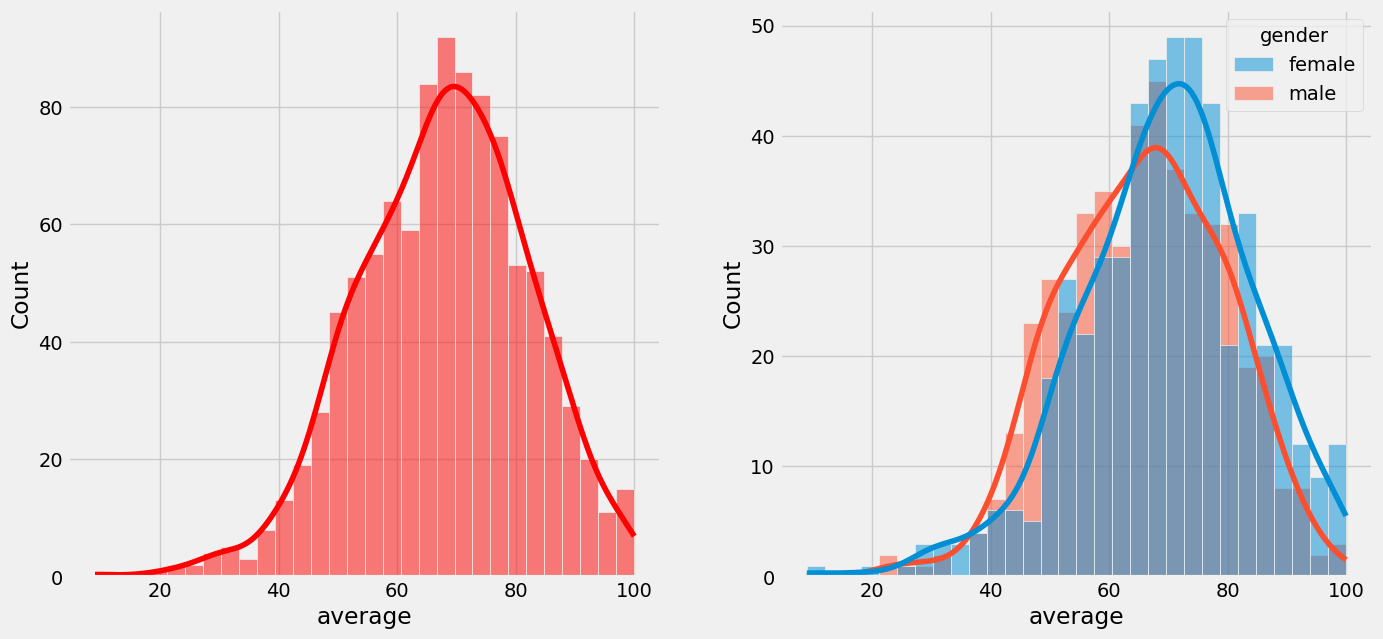

In [299]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()


<Axes: xlabel='total score', ylabel='Count'>

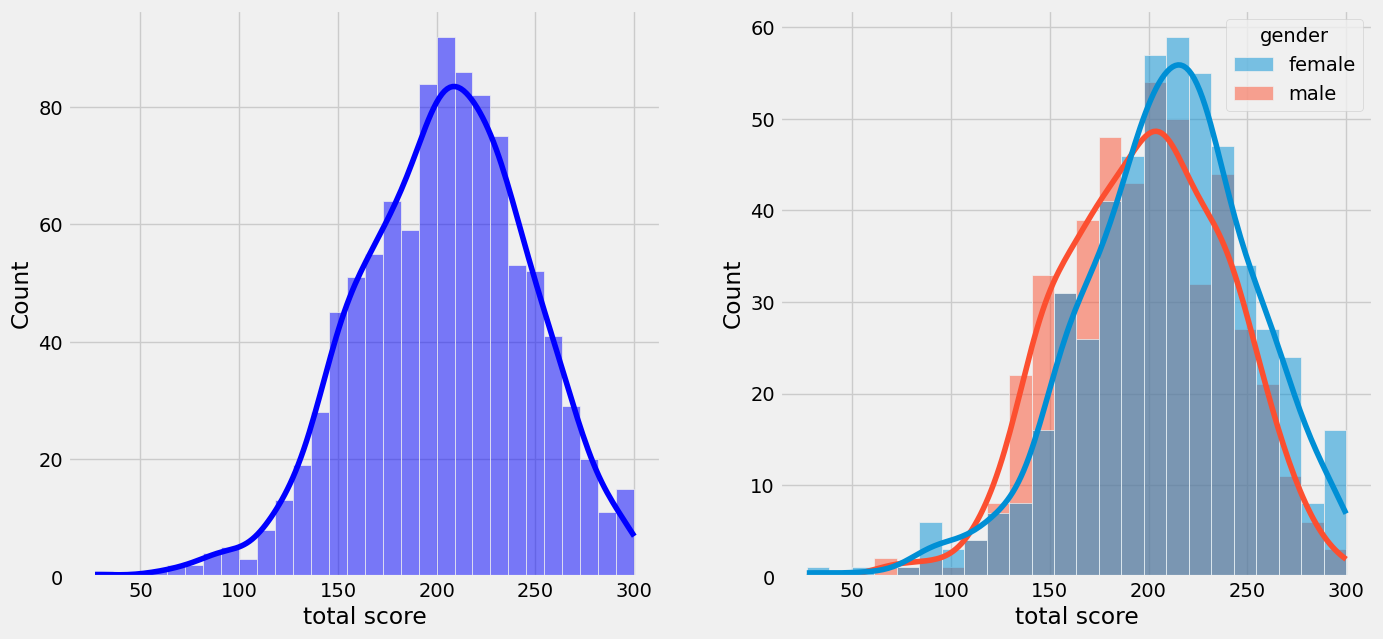

In [300]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')


Insights

Female students tend to perform well then male students.

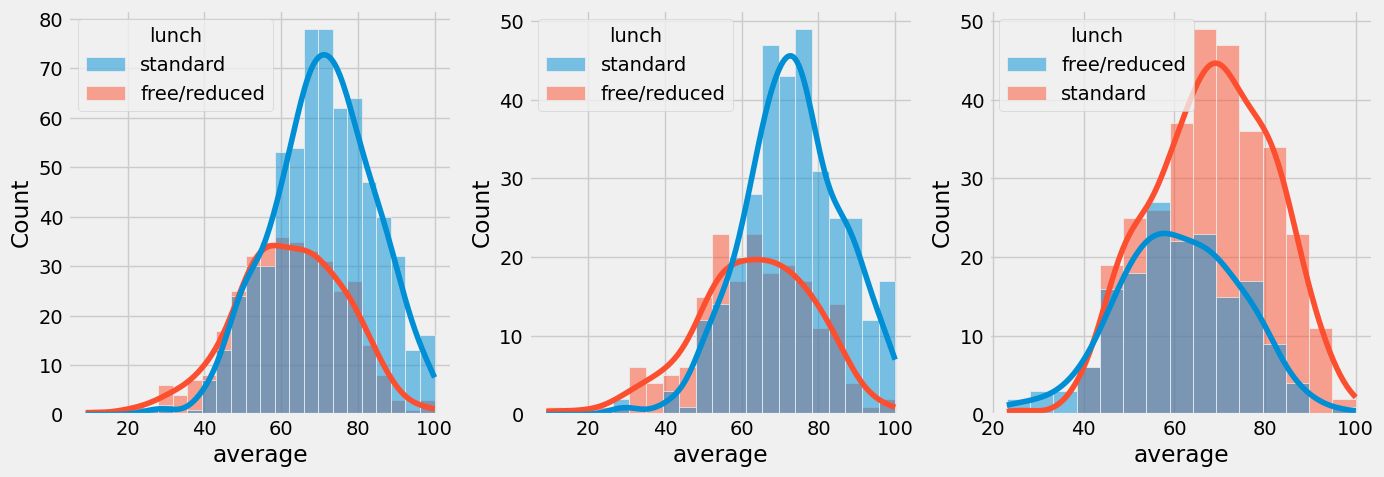

In [301]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()



Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

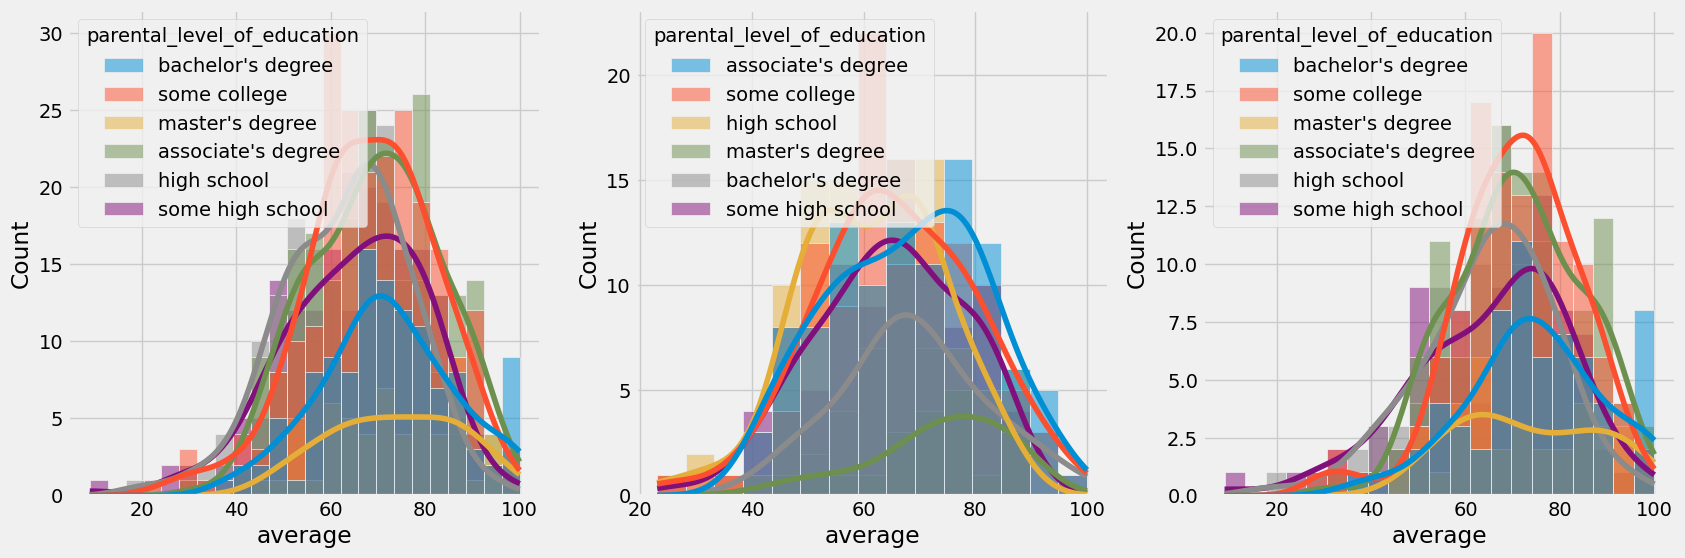

In [302]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()


Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

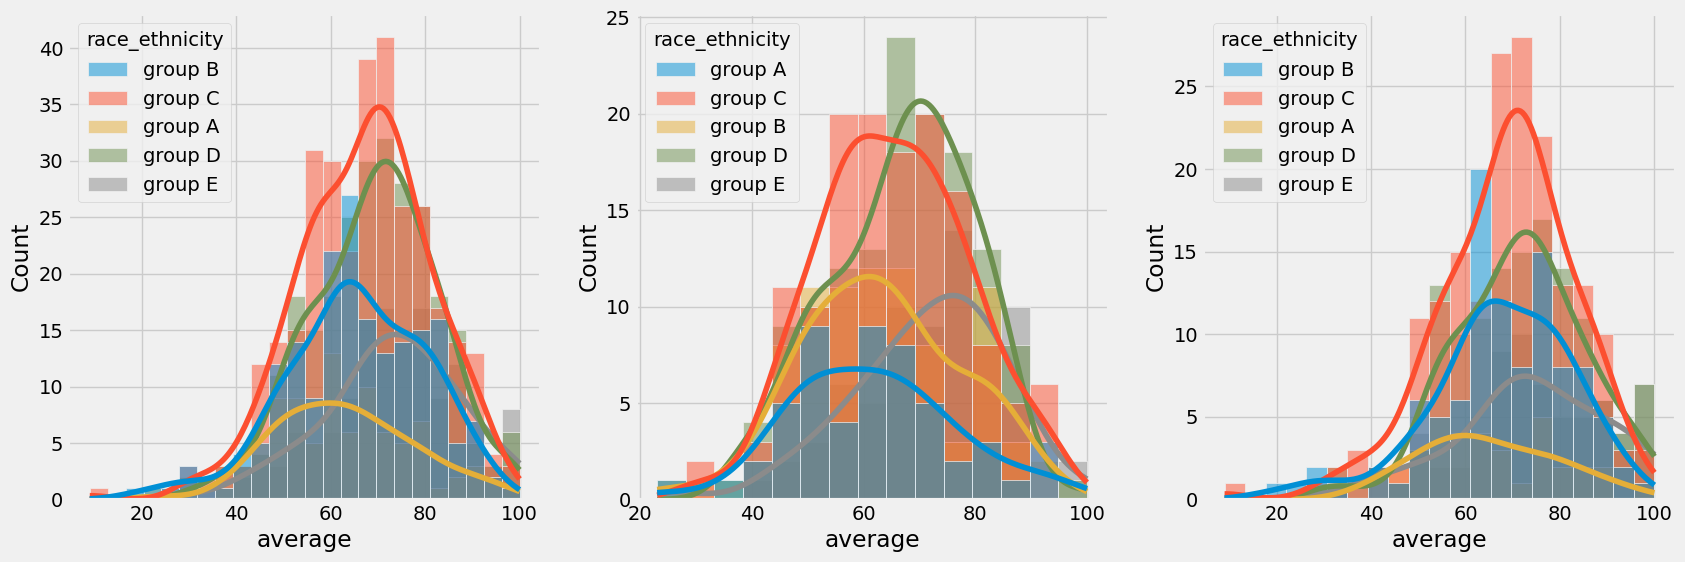

In [303]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='race_ethnicity')
plt.show()


Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

4.2 Maximumum score of students in all three subjects


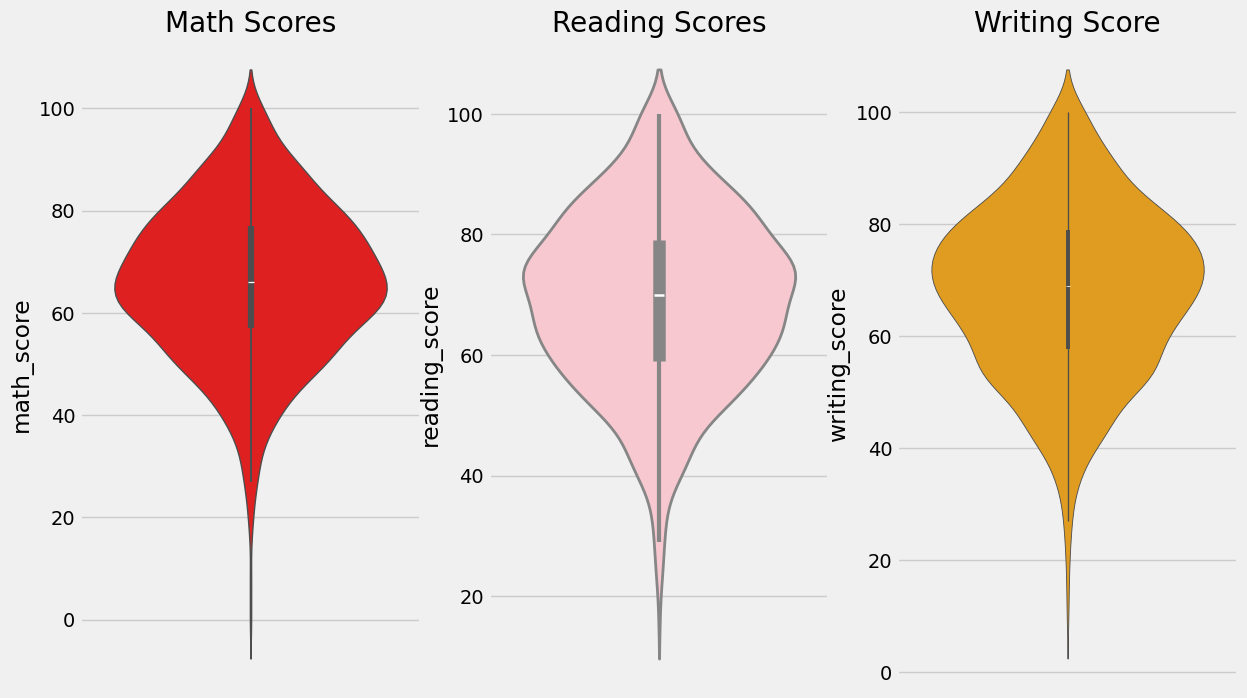

In [304]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=1)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='pink',linewidth=2)
plt.subplot(143)
plt.title('Writing Score')

sns.violinplot(y='writing_score',data=df,color='orange')

plt.show()

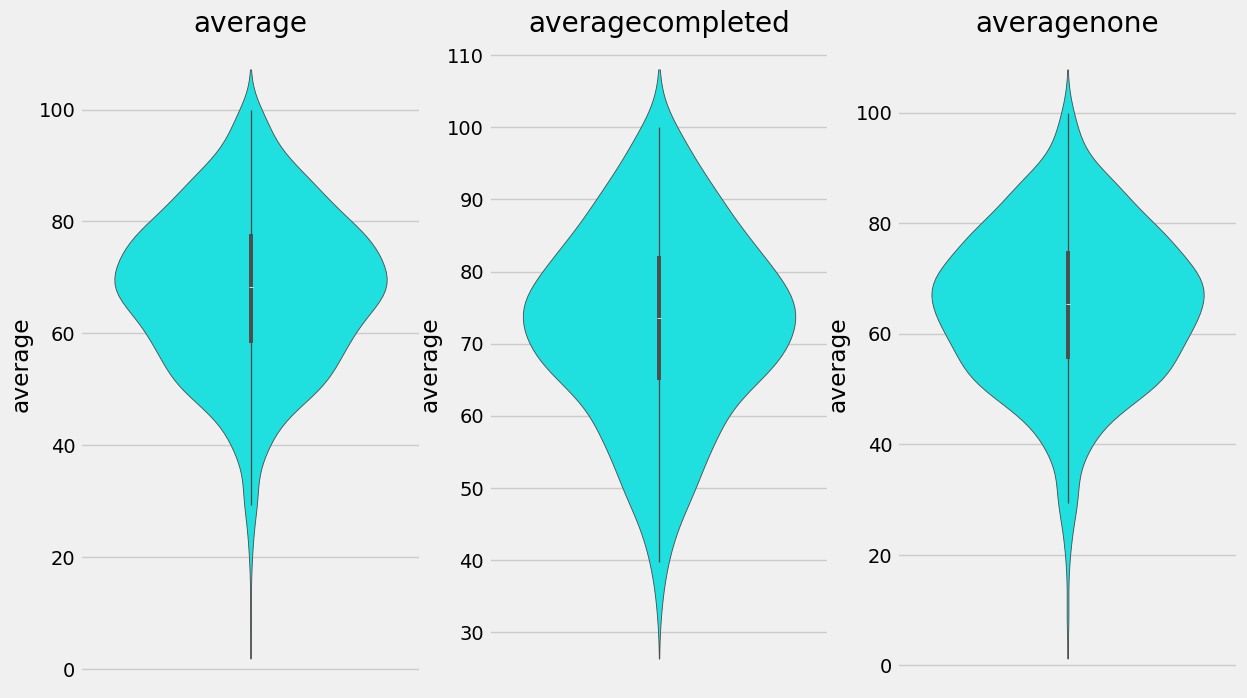

In [305]:
plt.figure(figsize=(18,8))

plt.subplot(141)
plt.title('average')
sns.violinplot(y='average',data=df,color='cyan')


plt.subplot(142)
plt.title('averagecompleted')
sns.violinplot(y='average',data=df[df.test_preparation_course=='completed'],color='cyan')

plt.subplot(143)
plt.title('averagenone')

sns.violinplot(y='average',data=df[df.test_preparation_course=='none'],color='cyan')
plt.show()


Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot


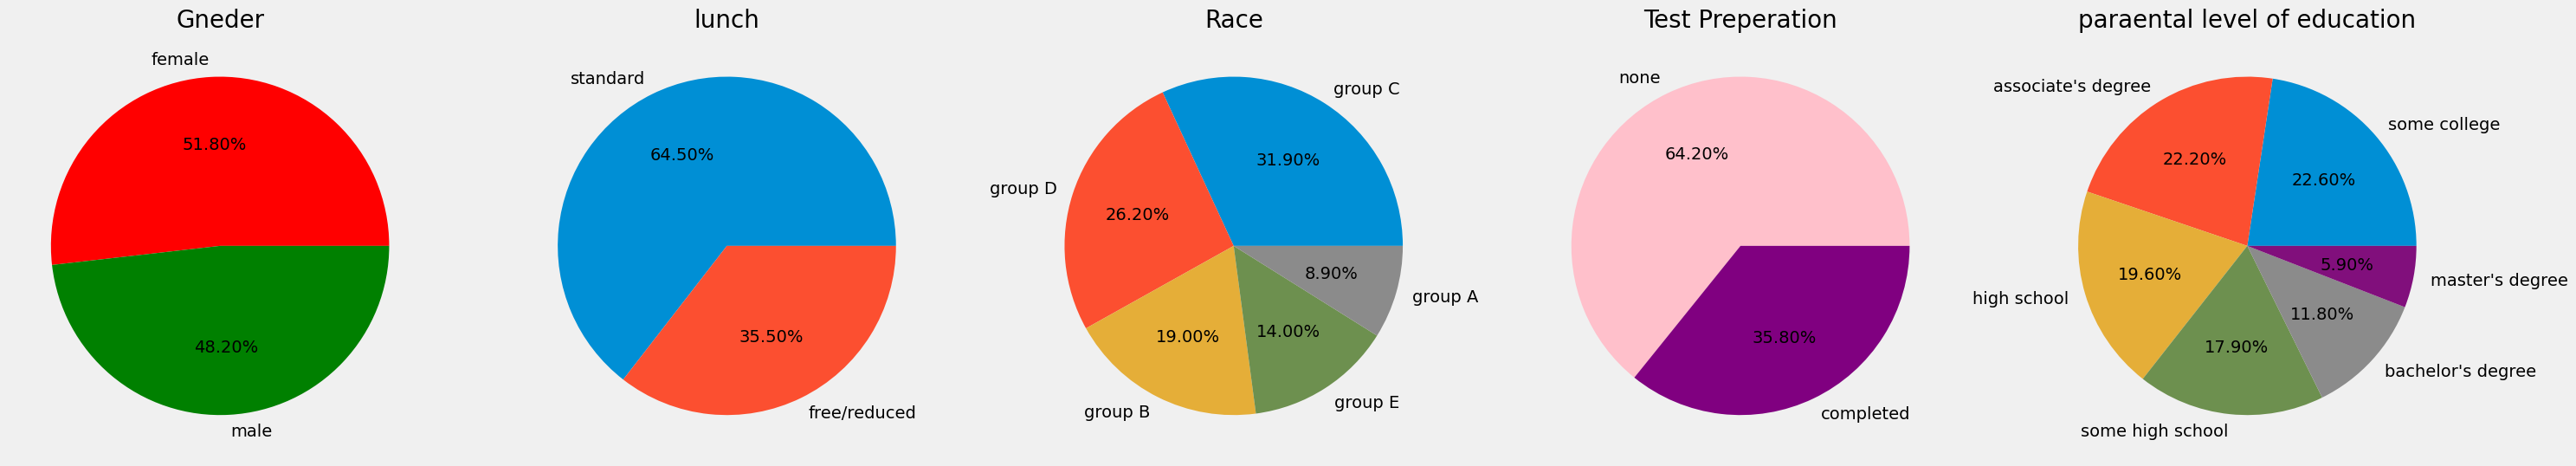

In [306]:
plt.rcParams['figure.figsize']=(30,20)
plt.subplot(151)
size=df['gender'].value_counts()
labels='female','male'
color=['r','g']
plt.axis('off')
plt.pie(size,colors=color, labels=labels,autopct='%.2f%%')
plt.title('Gneder', fontsize=20)

plt.subplot(152)
size=df['lunch'].value_counts()
plt.pie(size,labels=size.index,autopct='%.2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')


plt.subplot(153)
size=df['race_ethnicity'].value_counts()
plt.pie(size,labels=size.index, autopct='%.2f%%')
plt.axis('off')
plt.title('Race',fontsize=20)


plt.subplot(154)
size=df['test_preparation_course'].value_counts()
plt.pie(size,labels=size.index,autopct='%.2f%%',colors=['pink','purple'])
plt.axis('off')
plt.title('Test Preperation',fontsize=20)

plt.subplot(155)
size=df['parental_level_of_education'].value_counts()
plt.axis('off')
plt.pie(size,labels=size.index,autopct='%.2f%%')
plt.title('paraental level of education',fontsize= 20)

plt.tight_layout()
plt.grid()


plt.show()


Insights

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"



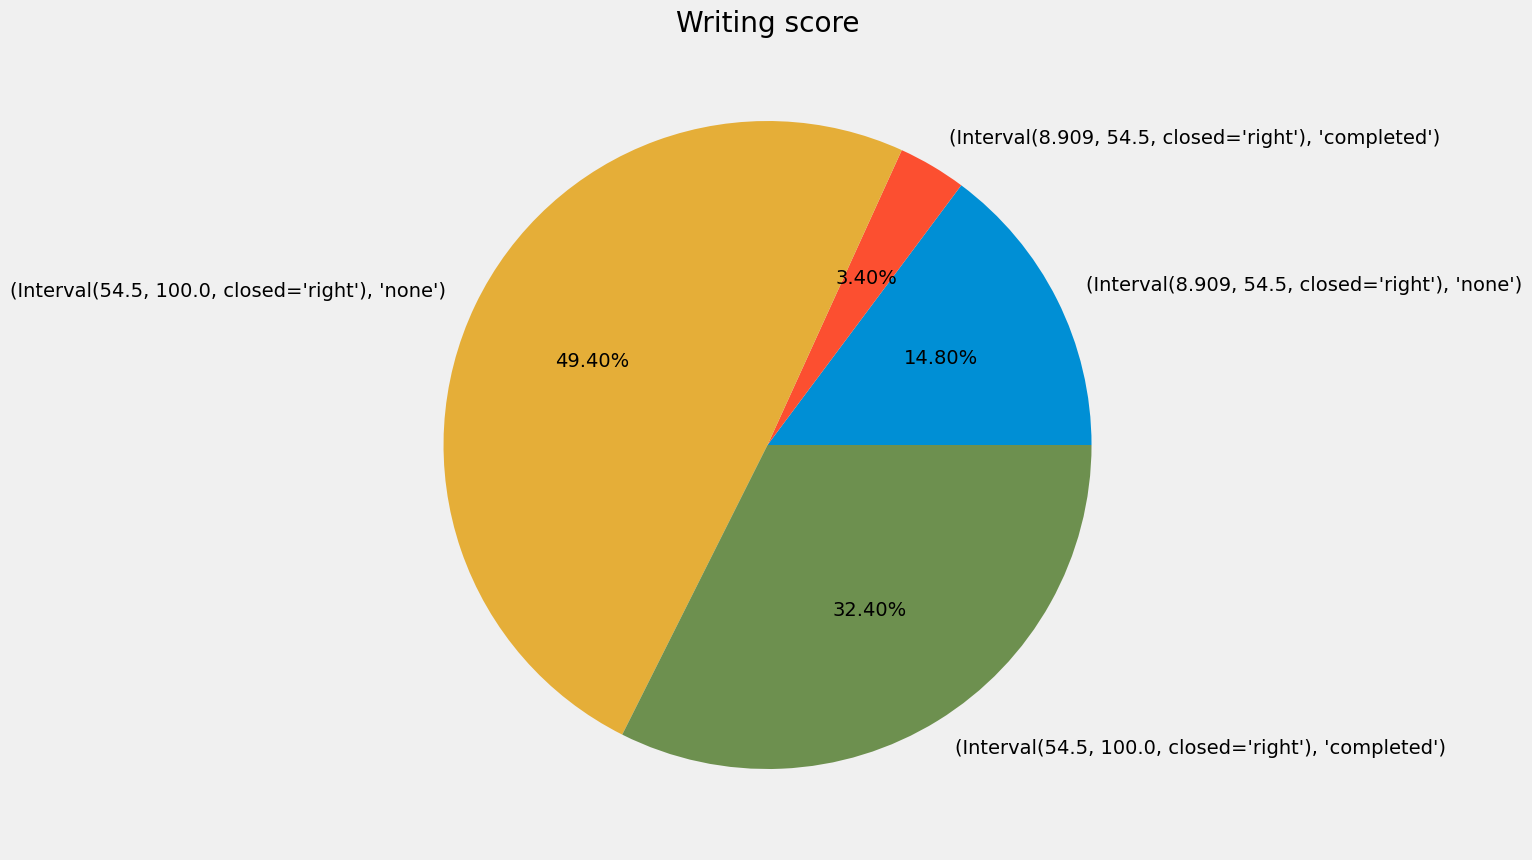

In [307]:
plt.figure(figsize=(10,10))
df['average_range'] = pd.cut(df['average'], bins=2)
size=df.groupby('average_range')['test_preparation_course'].value_counts()
plt.pie(size,labels=size.index, autopct='%.2f%%')
plt.title('Writing score')
plt.show()


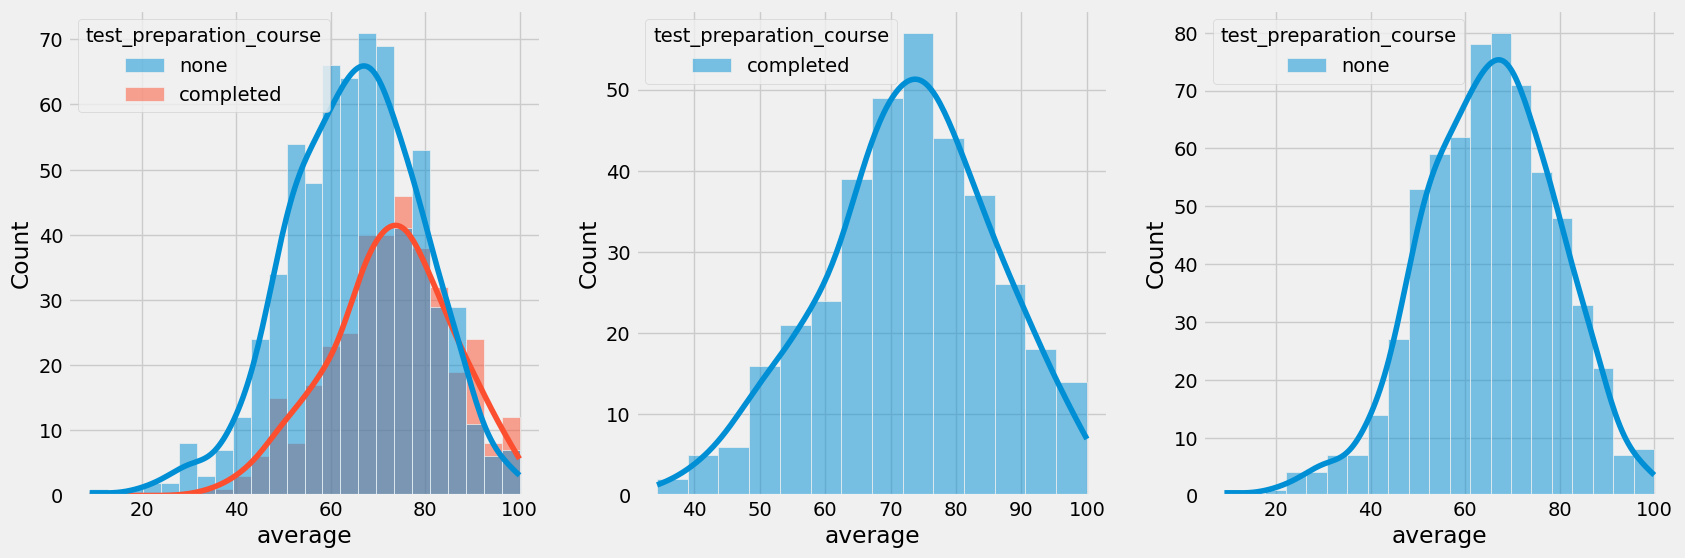

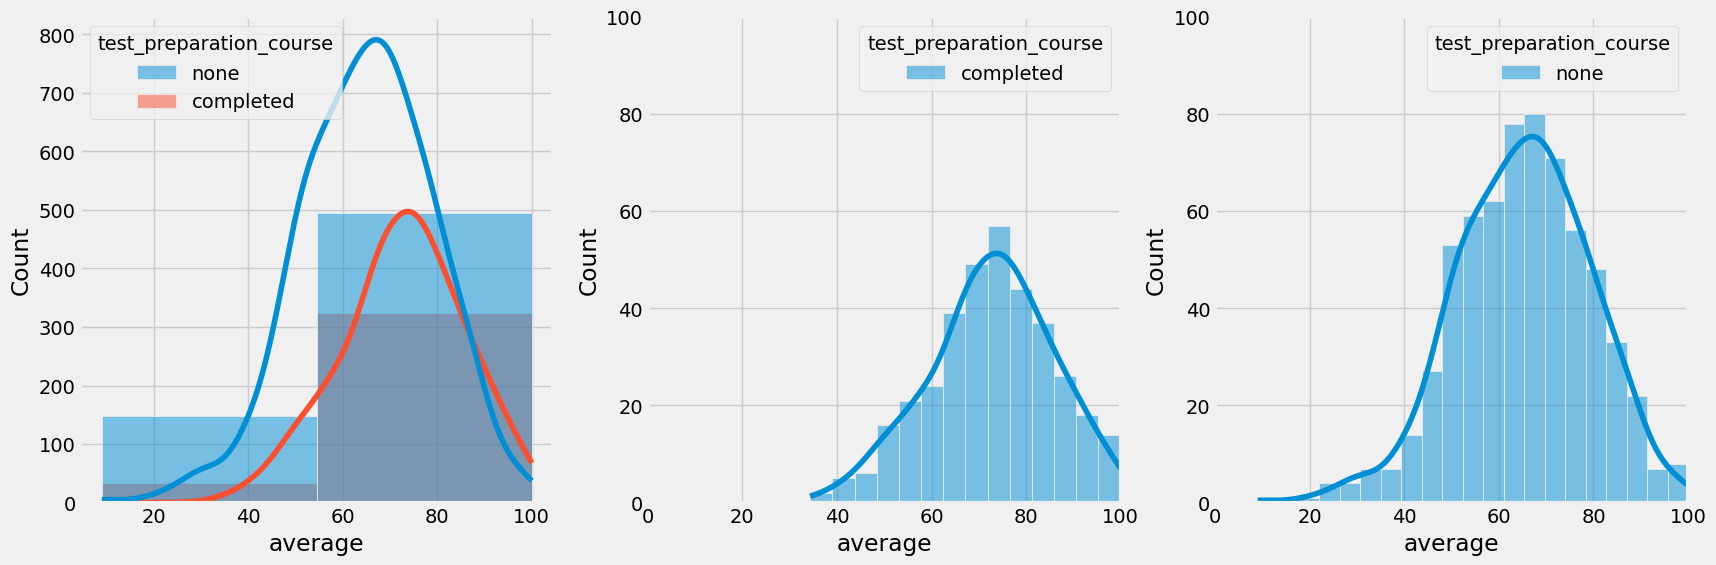

In [308]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.test_preparation_course=='completed'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.test_preparation_course=='none'], x='average',kde=True,hue='test_preparation_course')



plt.subplots(1, 3, figsize=(25, 6))


plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test_preparation_course',bins=2)



plt.subplot(142)
sns.histplot(data=df[df.test_preparation_course == 'completed'], x='average', kde=True, hue='test_preparation_course')
plt.xlim(0, 100)  
plt.ylim(0, 100)  


plt.subplot(143)
sns.histplot(data=df[df.test_preparation_course == 'none'], x='average', kde=True, hue='test_preparation_course')
plt.xlim(0, 100)  
plt.ylim(0, 100)  

plt.show()


4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )



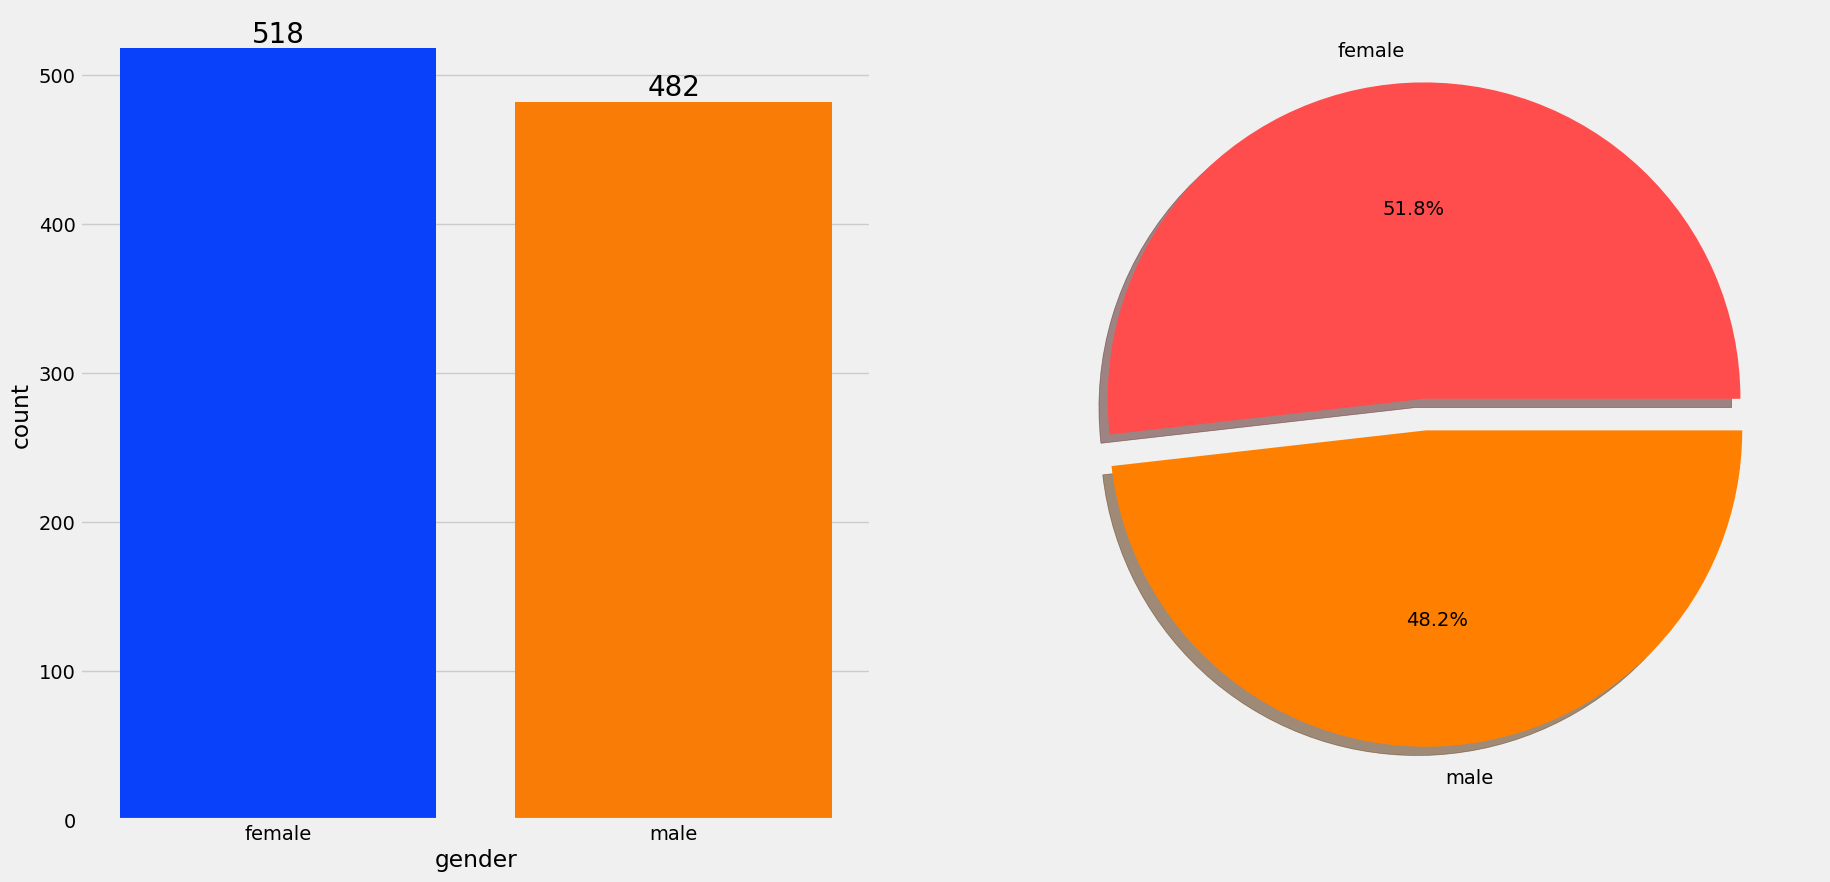

In [309]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
        ax[0].bar_label(container,color='black',size=20) 

plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index, explode=[0.05,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.show()



Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [310]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group



math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483

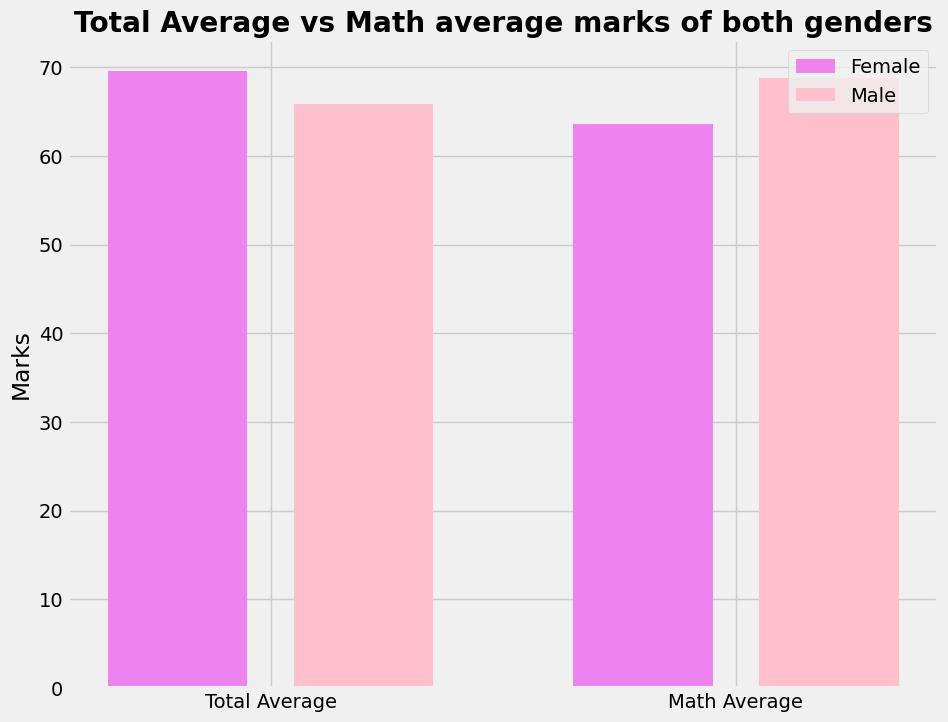

In [311]:
plt.figure(figsize=(10,8))
female_score=[gender_group['average'][0], gender_group['math_score'][0]]
male_score=[gender_group['average'][1], gender_group['math_score'][1]]
X=['Total Average','Math Average']
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,female_score,0.3,label='Female',color='violet')
plt.bar(X_axis+0.2,male_score,0.3,label='Male',color='pink')
plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total Average vs Math average marks of both genders",fontweight="bold")
plt.legend()
plt.show()



In [312]:
df.describe()

math_score  reading_score  writing_score  total score      average
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000    67.770667
std      15.16308      14.600192      15.195657    42.771978    14.257326
min       0.00000      17.000000      10.000000    27.000000     9.000000
25%      57.00000      59.000000      57.750000   175.000000    58.333333
50%      66.00000      70.000000      69.000000   205.000000    68.333333
75%      77.00000      79.000000      79.000000   233.000000    77.666667
max     100.00000     100.000000     100.000000   300.000000   100.000000

Insights

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

4.4.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

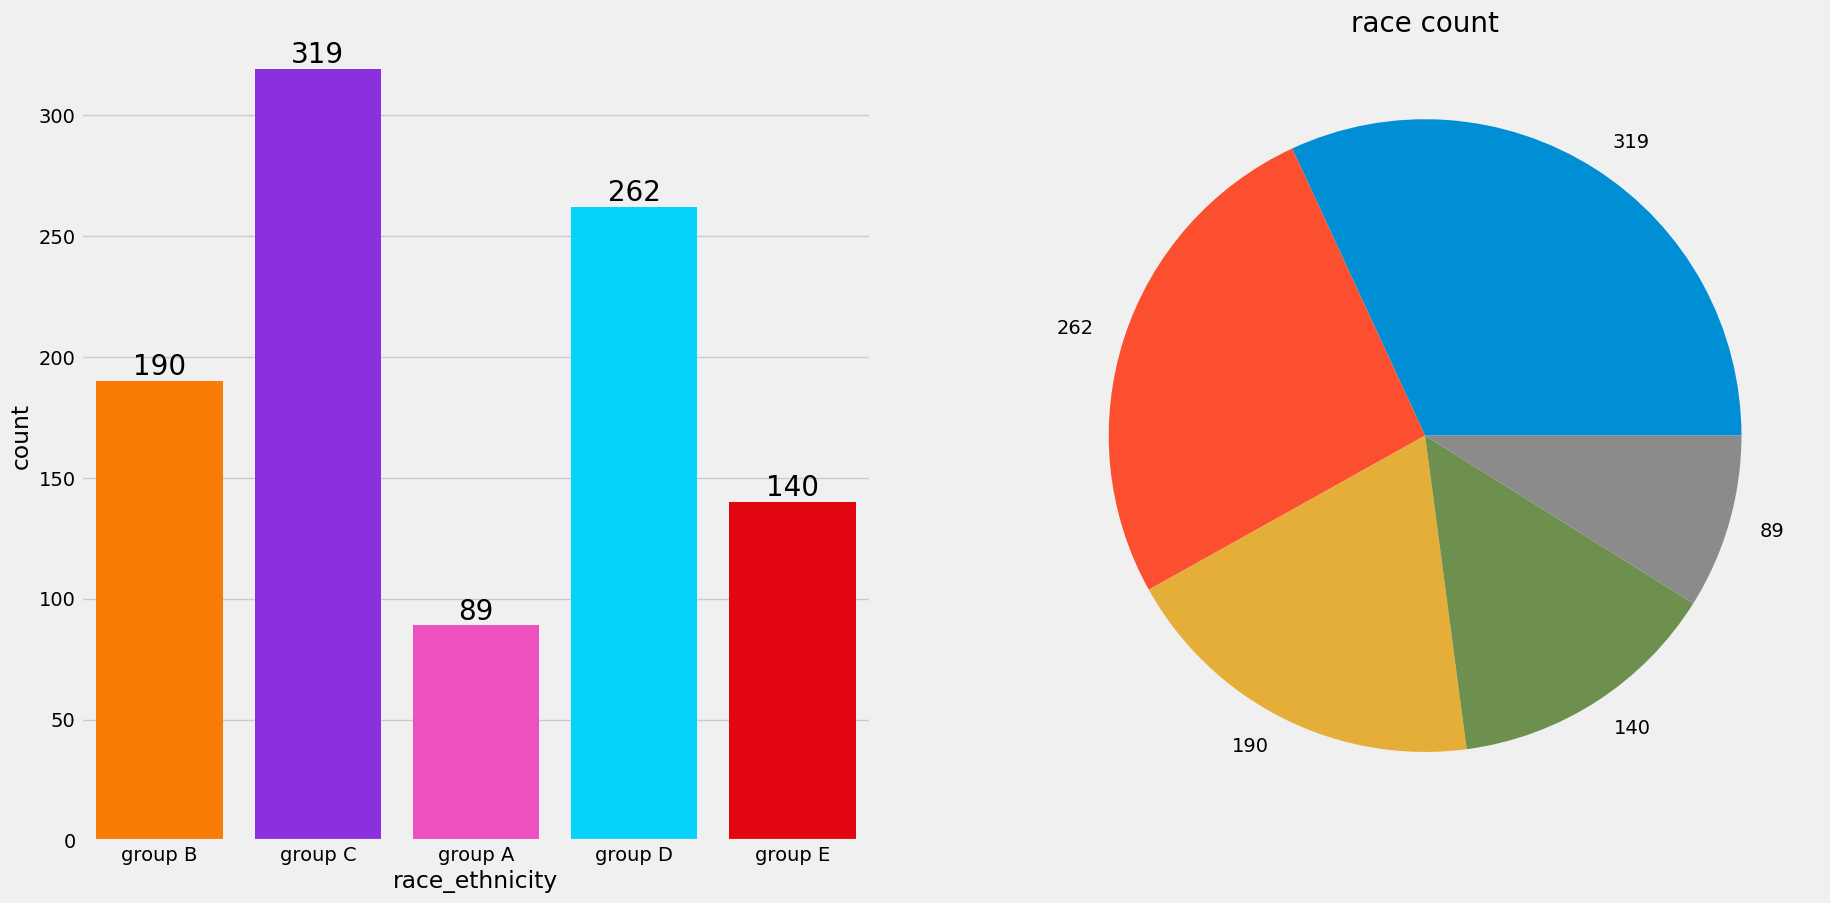

In [313]:
f,ax=plt.subplots(1,2,figsize=(20,10))
bright_palette = sns.color_palette("bright")

sns.countplot(x=df['race_ethnicity'],data=df,palette=[bright_palette[1], bright_palette[4], bright_palette[6], bright_palette[9], bright_palette[3]],ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts())
plt.title('race count',fontsize=20)

plt.show()


In [314]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [315]:
df.groupby('race_ethnicity').mean(numeric_only=True)

math_score  reading_score  writing_score  total score  \
race_ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528   
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                  average  
race_ethnicity             
group A         62.992509  
group B         65.468421  
group C         67.131661  
group D         69.179389  
group E         72.752381

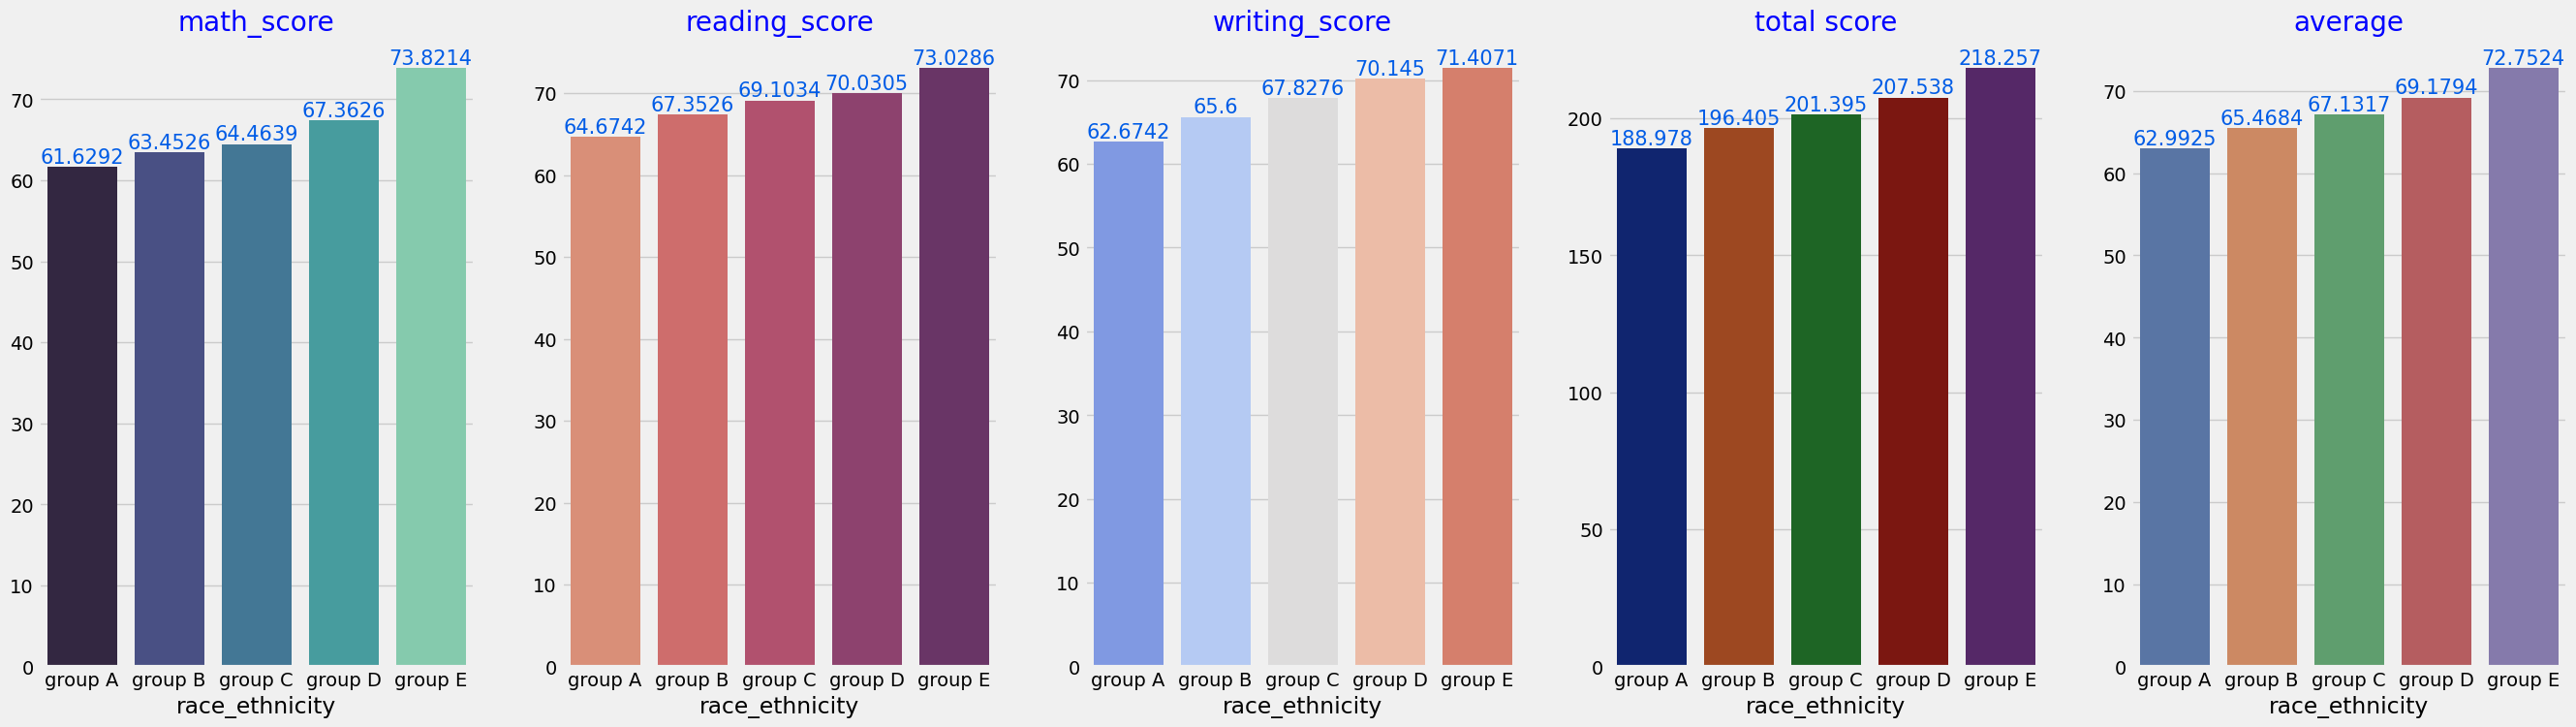

In [316]:
Group_data=df.groupby('race_ethnicity').mean(numeric_only=True)
f,ax=plt.subplots(1,5, figsize=(30,8))
p=['mako','flare','coolwarm','dark','deep']
for i,col in enumerate(Group_data.columns ):
    sns.barplot(x=Group_data.index,y=Group_data[col].values,ax=ax[i],palette=p[i])

    ax[i].set_title(col,color='b')
    for container in ax[i].containers:
        ax[i].bar_label(container,color='#005ce6',size=15)

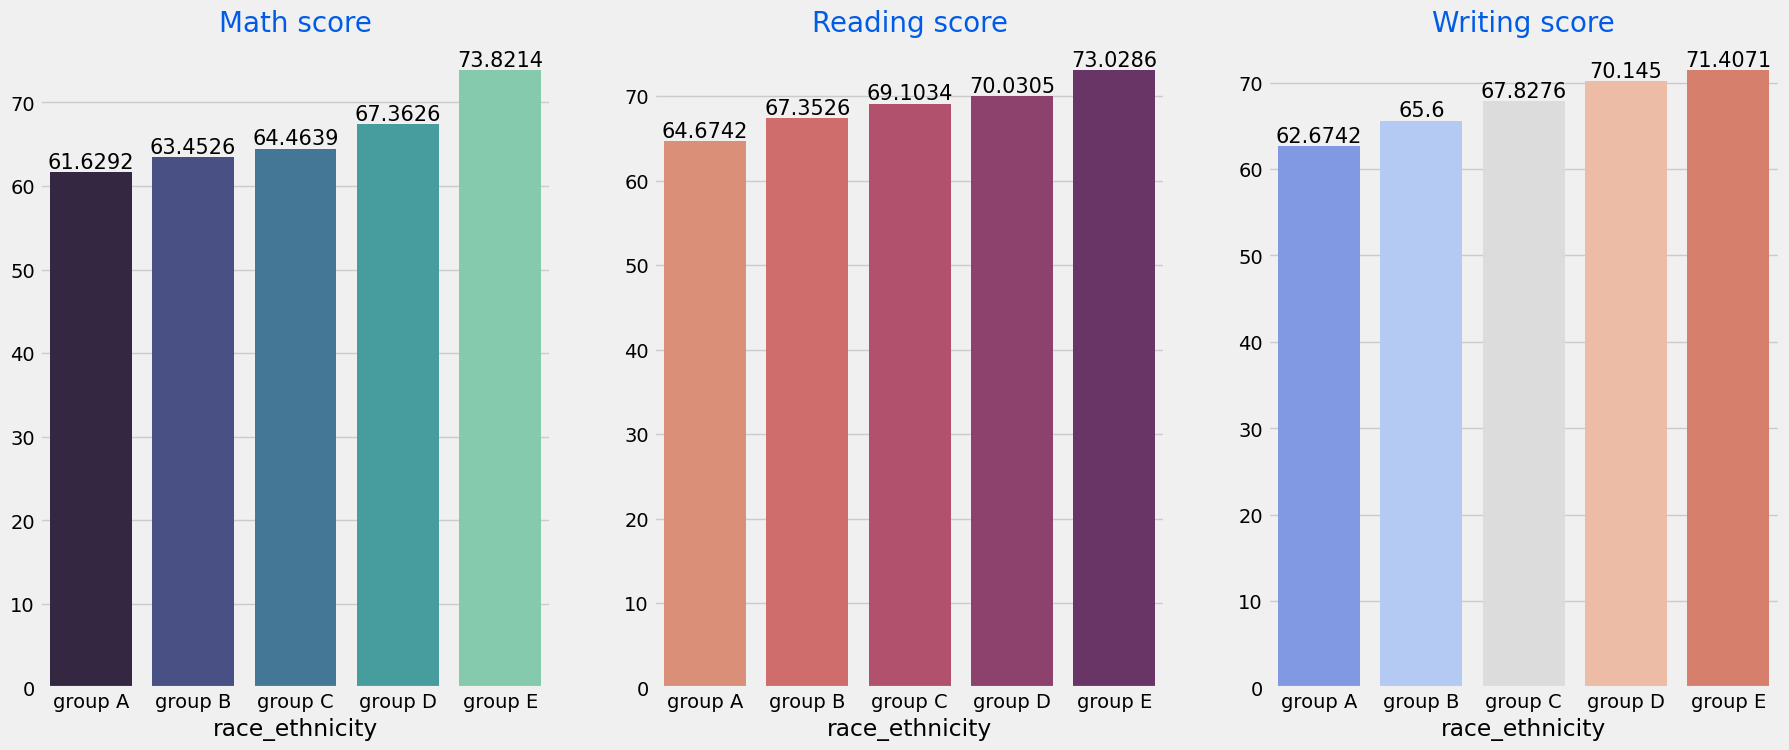

In [317]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


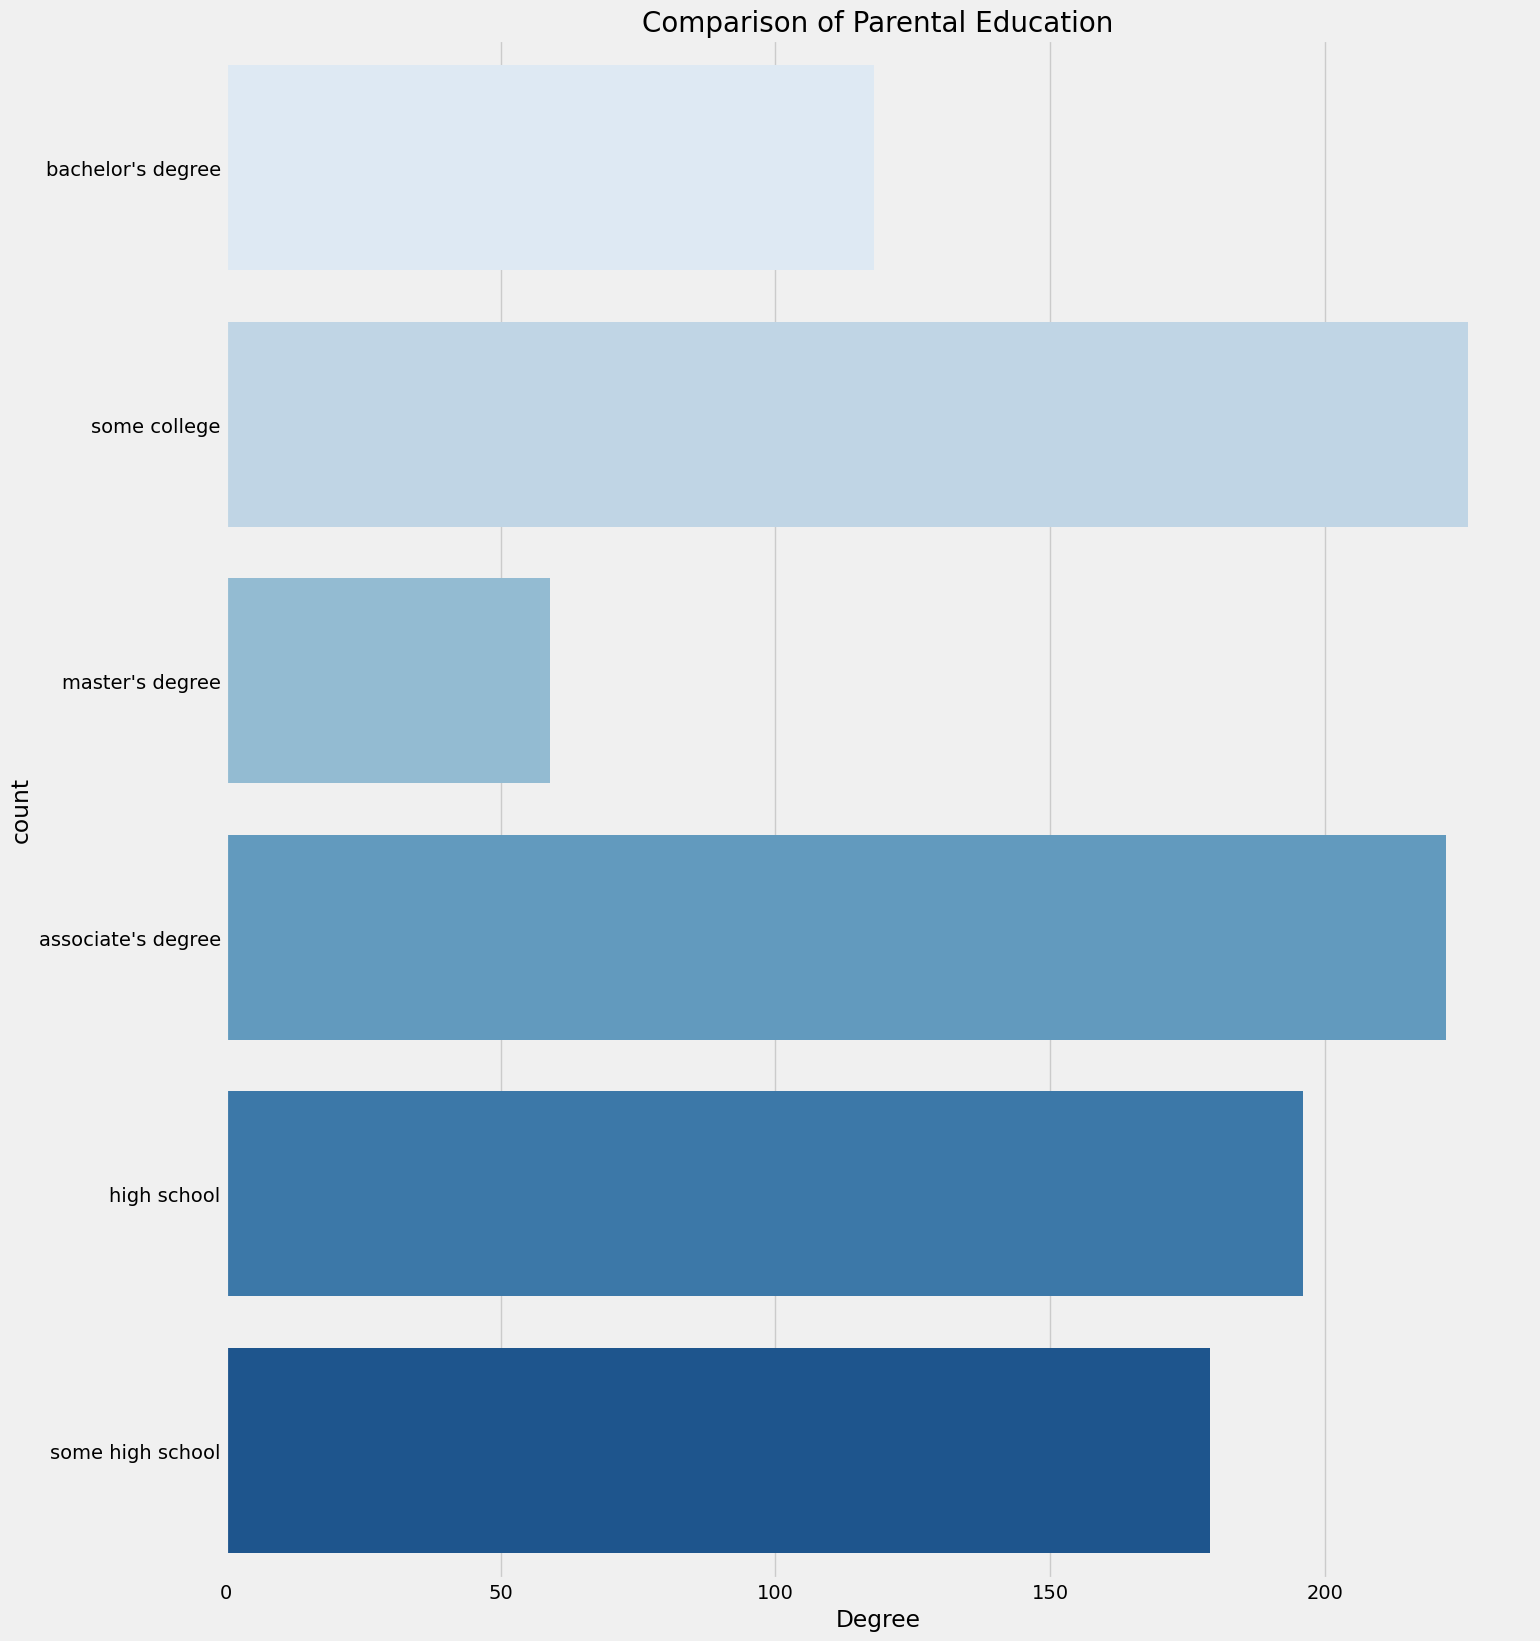

In [318]:
plt.rcParams['figure.figsize']=(15,19)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')


plt.show()

Insights

Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [319]:
df.groupby('parental_level_of_education').mean(numeric_only=True)


math_score  reading_score  writing_score  \
parental_level_of_education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             total score    average  
parental_level_of_education                          
associate's degree            208.707207  69.569069  
bachelor's degree             215.771186  71.923729  
high school                   189.290816  63.096939  
master's degree               220.796610  73.598870  
some college                  205.429204  68.476401  
some high school              195.324022  65.108007

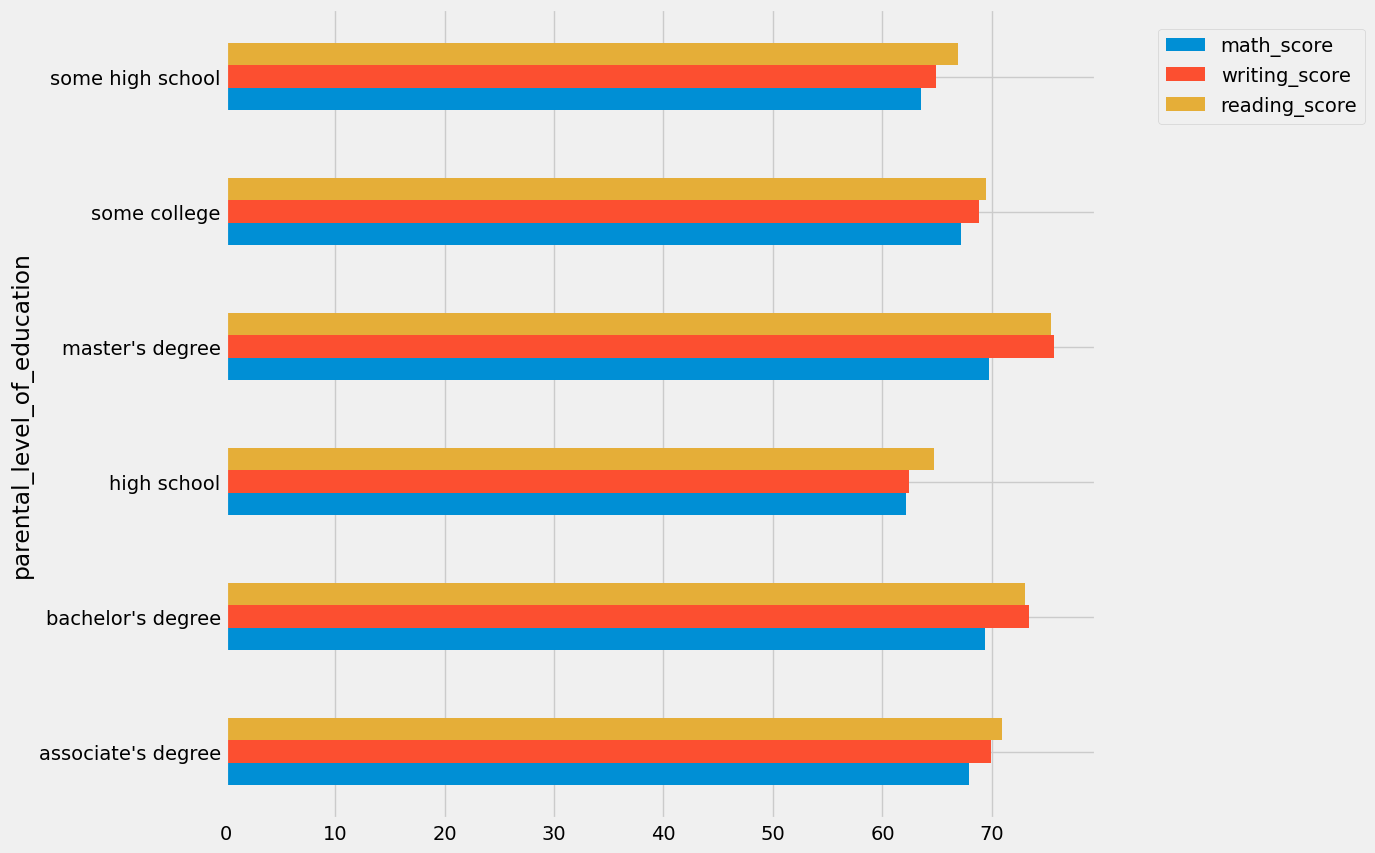

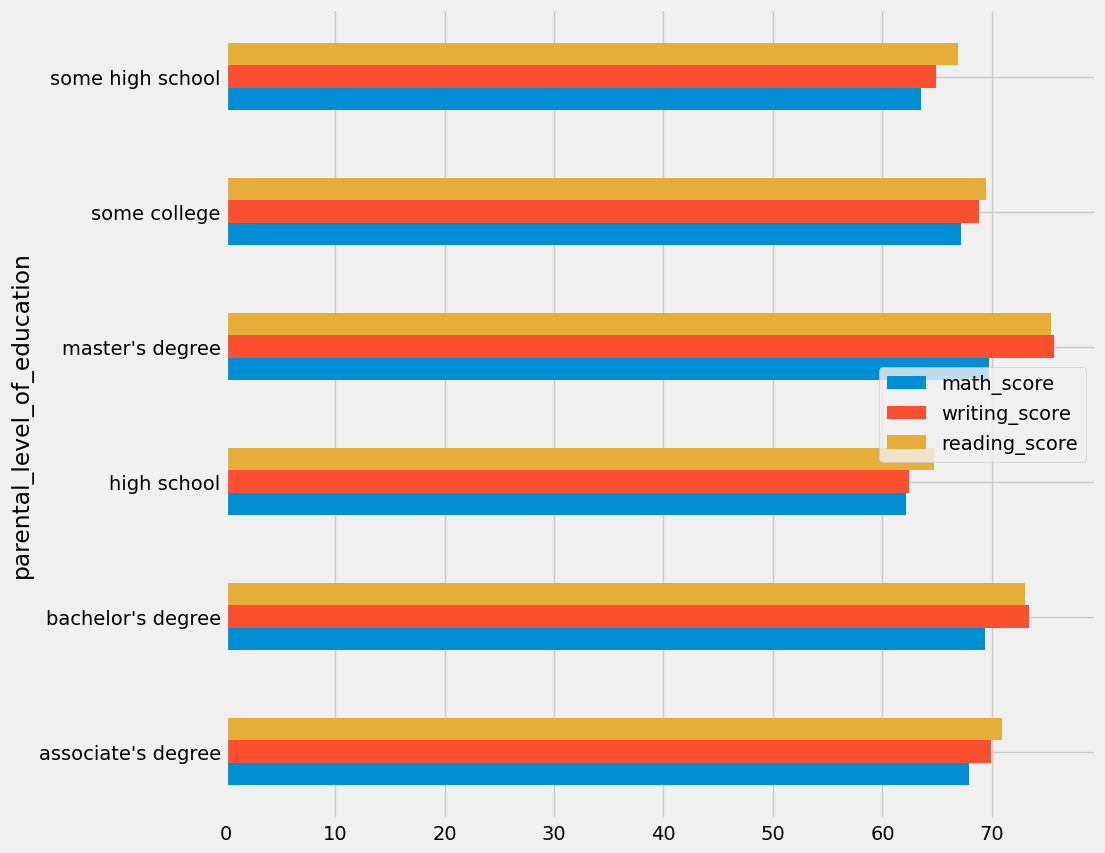

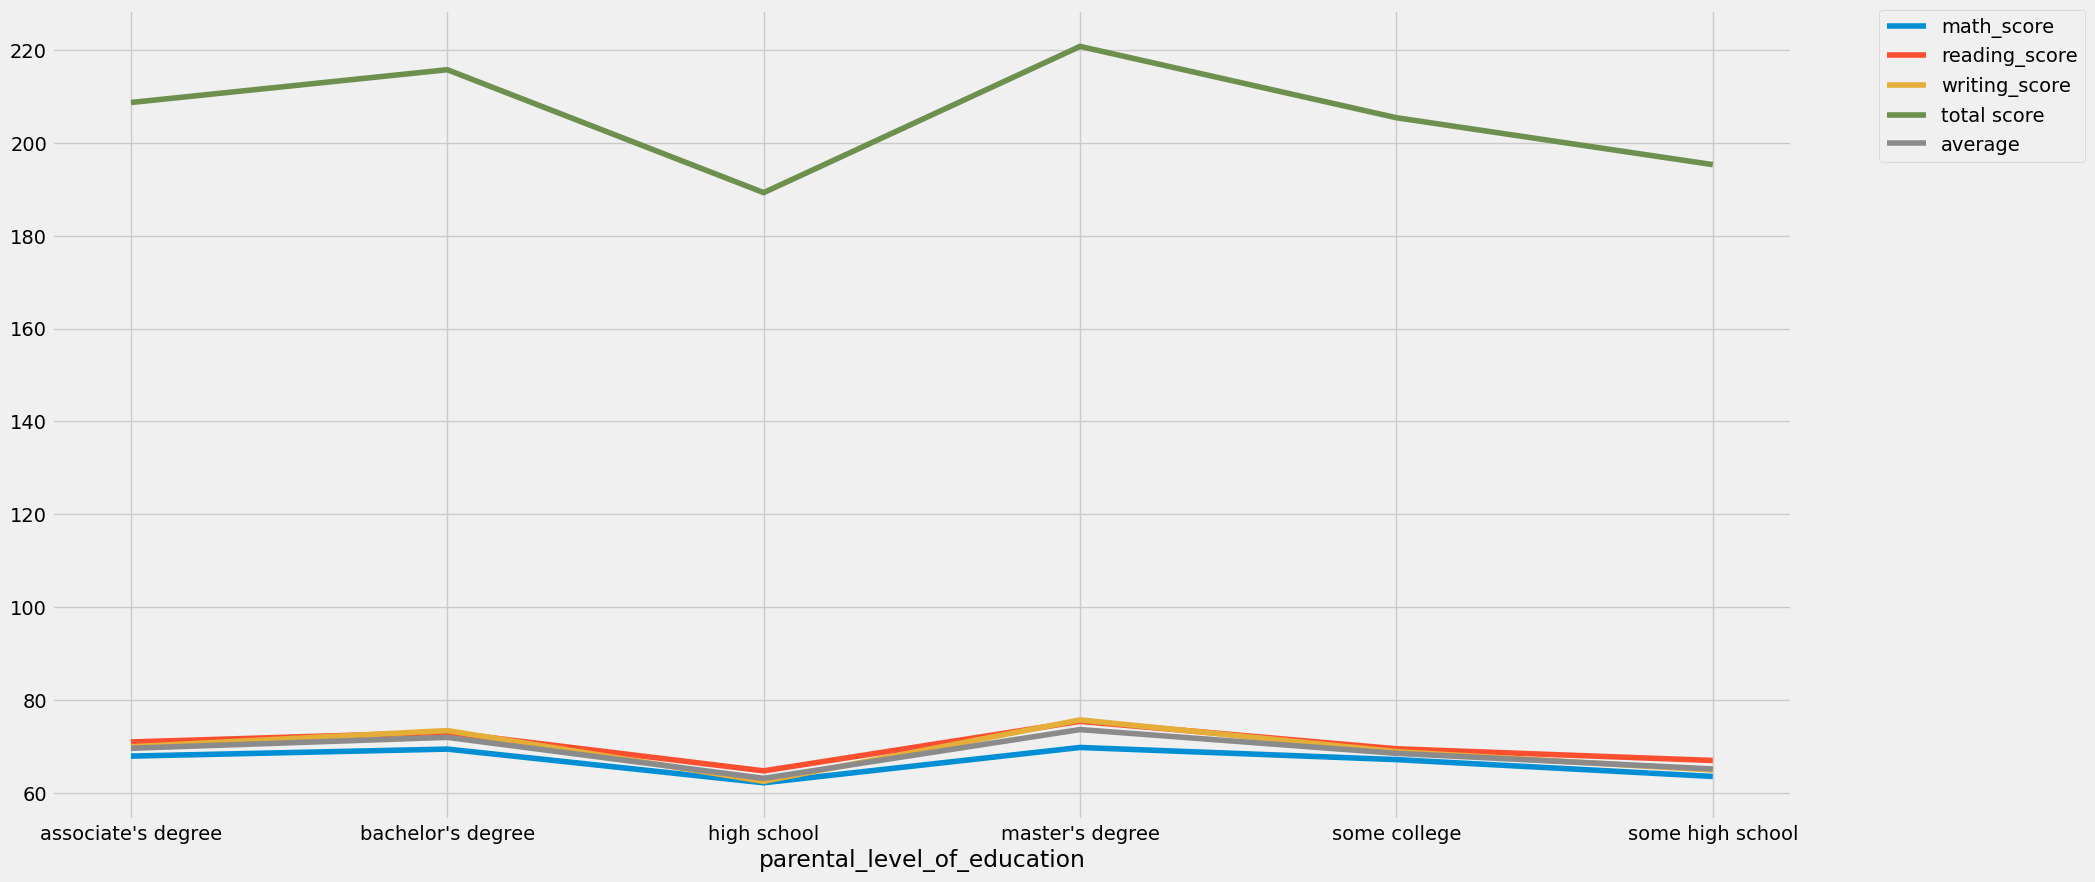

In [320]:
df.groupby('parental_level_of_education')[['math_score','writing_score','reading_score']].agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
df.groupby('parental_level_of_education')[['math_score','writing_score','reading_score']].agg('mean').plot(kind='barh', figsize=(10, 10))

df.groupby('parental_level_of_education').mean(numeric_only=True).plot(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()



Insights

The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


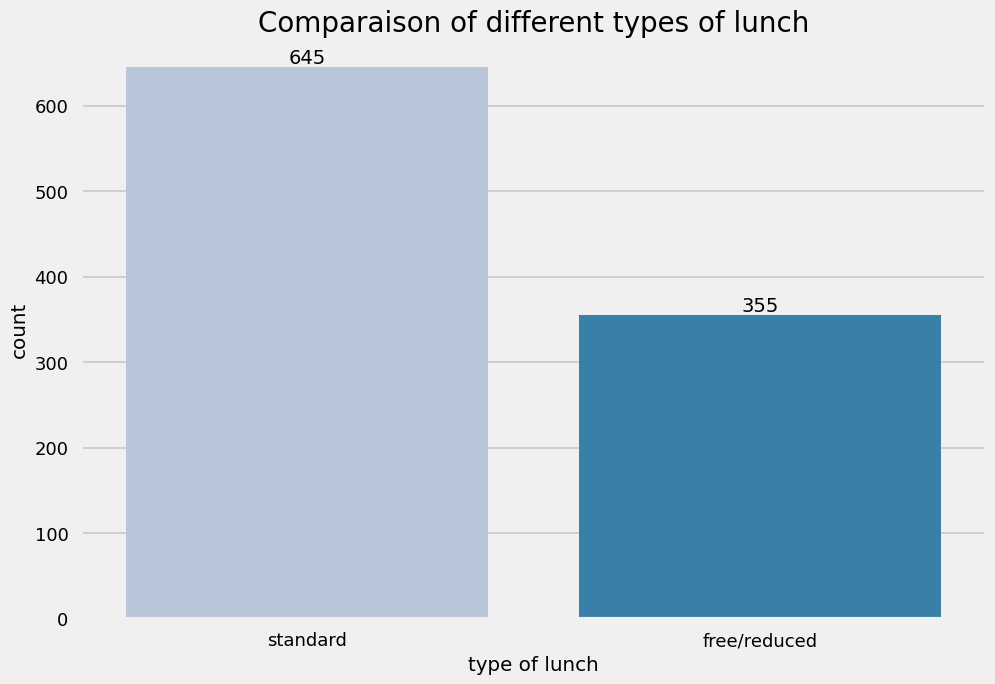

In [321]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')


ax=sns.countplot(x=df['lunch'],palette='PuBu')
for container in ax.containers :
    ax.bar_label(container)

plt.title('Comparaison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()


Insights

Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

In [322]:
df.groupby('lunch').mean(numeric_only=True)


math_score  reading_score  writing_score  total score    average
lunch                                                                         
free/reduced   58.921127      64.653521      63.022535   186.597183  62.199061
standard       70.034109      71.654264      70.823256   212.511628  70.837209

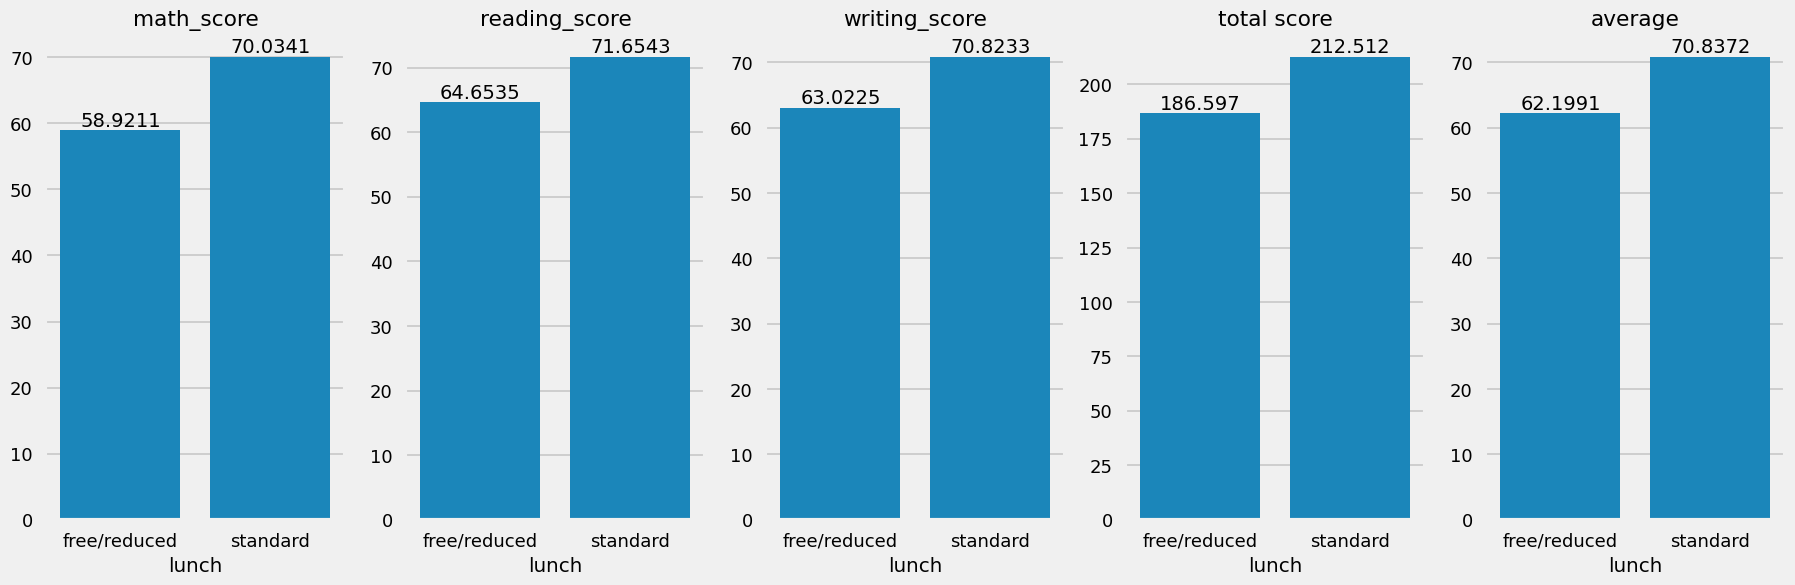

In [323]:
p=df.groupby('lunch').mean(numeric_only=True)
f,ax=plt.subplots(1,len(p.columns),figsize=(20,6))
for i, col in enumerate (p.columns):
    sns.barplot(x=p.index,y=p[col].values, ax=ax[i])
    ax[i].set_title(col)
    for container in ax[i].containers:
        ax[i].bar_label(container)
   



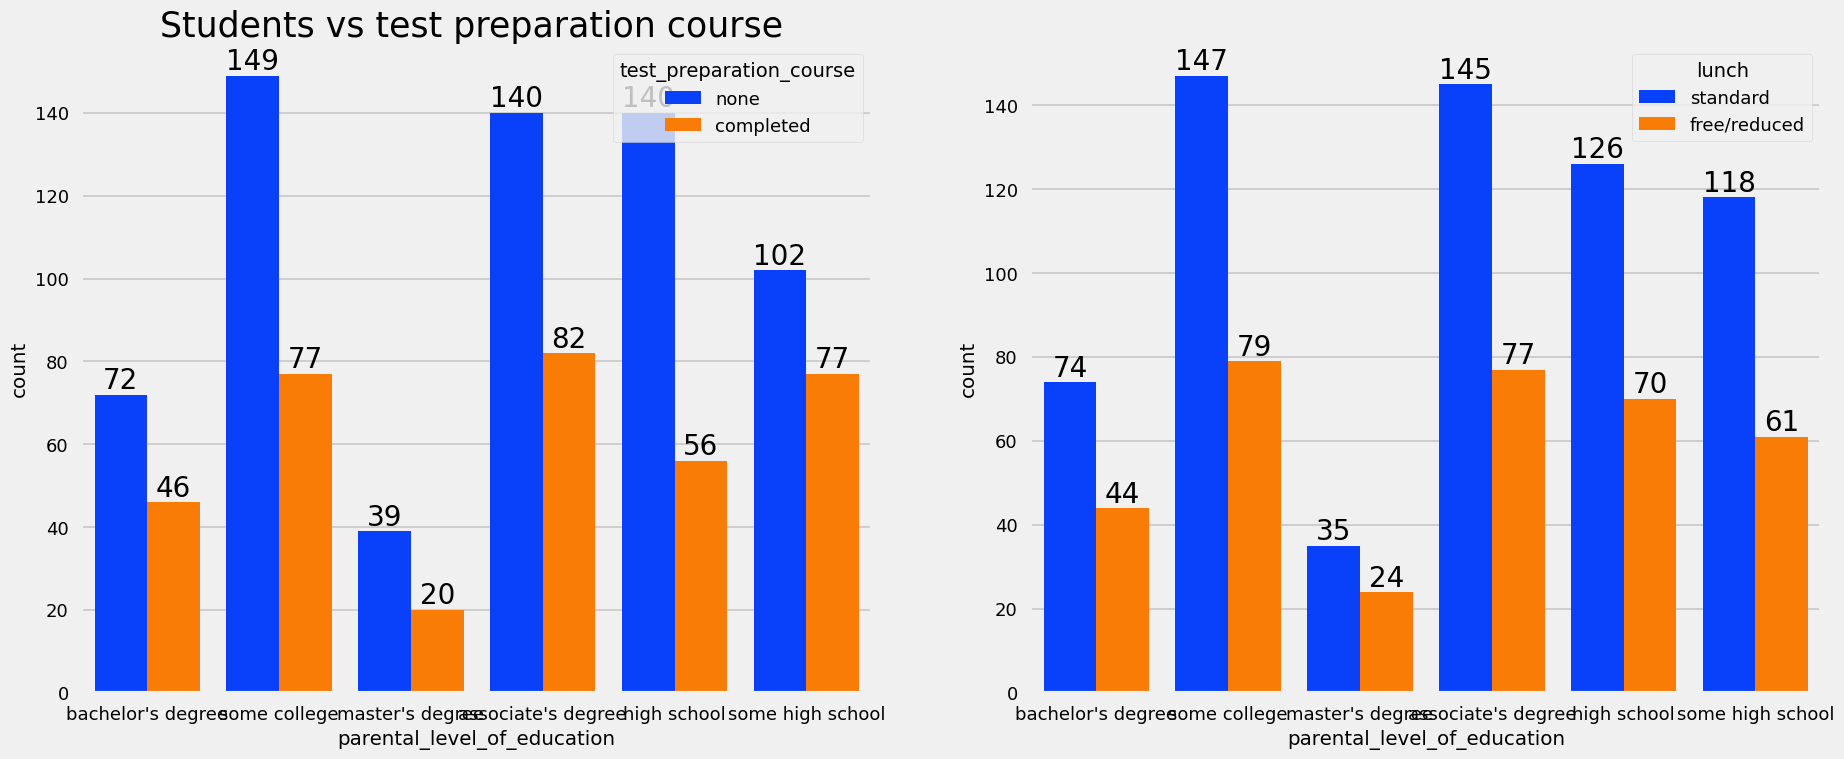

In [324]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

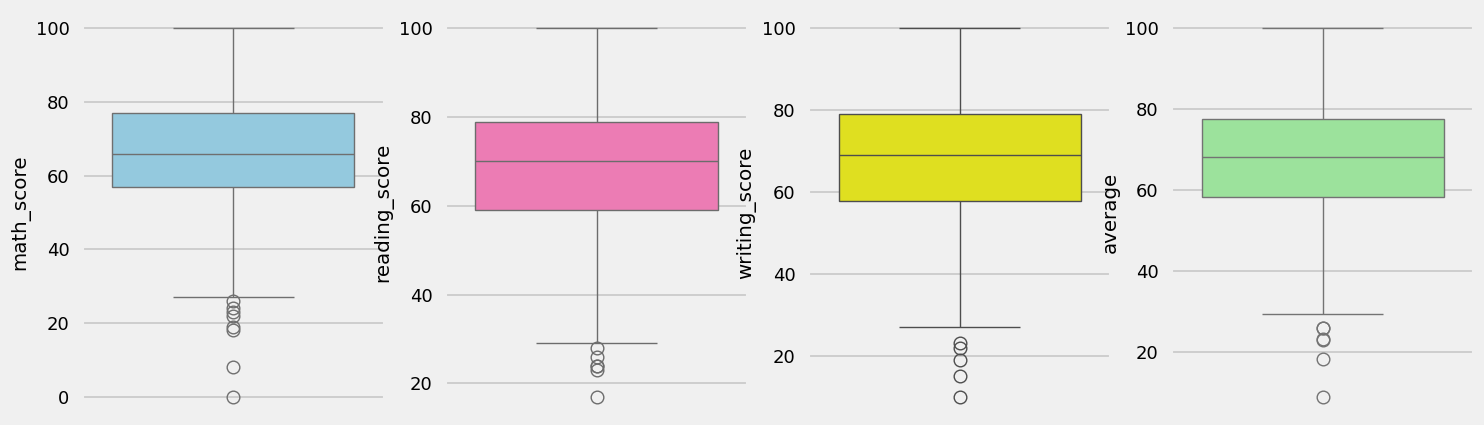

In [325]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


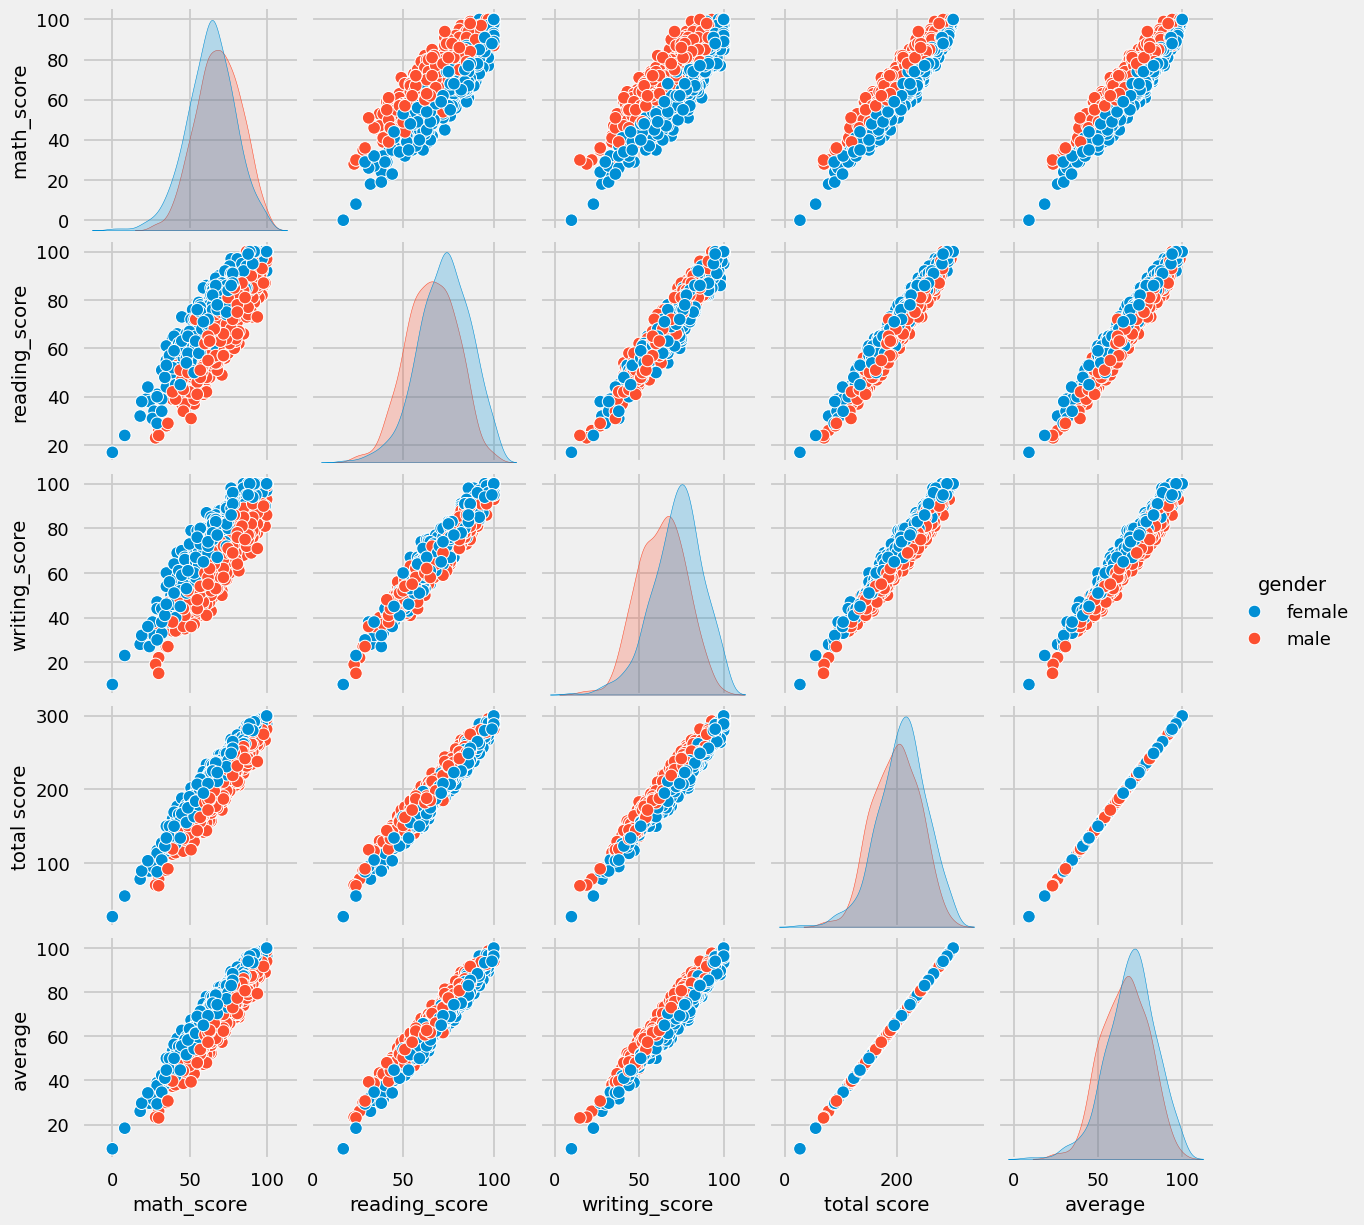

In [326]:
sns.pairplot(df,hue='gender')
plt.show()

Insights
From the above plot it is clear that all the scores increase linearly with each other.
5. Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.

Comparison of Numeric and Categorical Variables

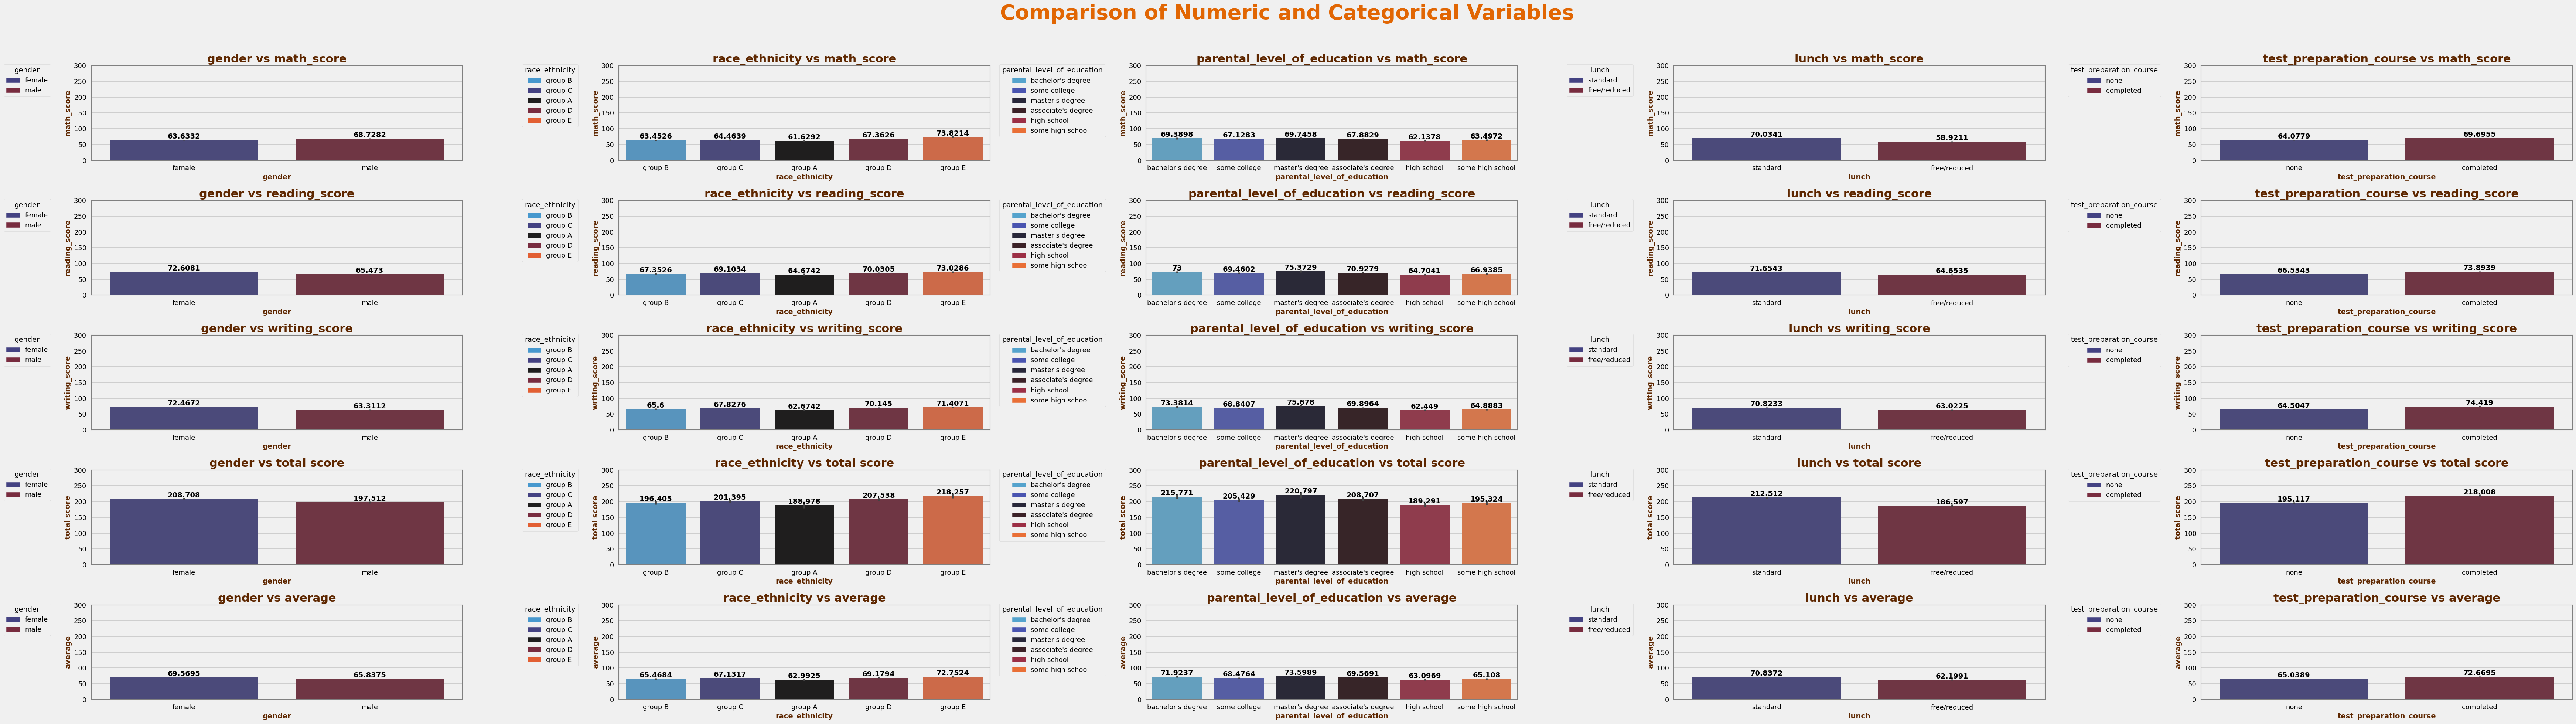

In [327]:
import matplotlib.patches as mpatches  # Import mpatches for custom legend handles


plt.figure(figsize=(70 , 20 ))
plt.suptitle("Comparison of Numeric and Categorical Variables", 
             fontsize=40, fontweight='bold',color='#e16603')
plt.style.use('seaborn-talk')

p = df.select_dtypes(include=['number'])  
d = df.select_dtypes(include=['object']) 


for i, col in enumerate(p.columns):  
    for j, coll in enumerate(d.columns): 
        plt.subplot(len(d.columns), len(p.columns), i * len(d.columns) + j + 1)
        plt.xlim(0, 100)  
        plt.ylim(0, 300) 
        palette = sns.color_palette('icefire', n_colors=len(df[coll].unique()))

        ax=sns.barplot(x=df[coll], y=df[col], hue=df[coll], palette=palette)
        ax.set_xlabel(coll, fontsize=14, fontweight='bold' ,color='#5e2700')  
        ax.set_ylabel(col, fontsize=14,fontweight ='bold',color='#5e2700')  

        for container in ax.containers:
            ax.bar_label(container,fontsize=14,fontweight='bold')
        
        plt.title(f"{coll} vs {col}",fontsize=22,fontweight='bold', color='#5e2700' )
        for spine in ax.spines.values():  
            spine.set_edgecolor("grey")  
            spine.set_linewidth(1.5) 
        handles = [mpatches.Patch(color=palette[k], label=str(label)) 
                    for k, label in enumerate(df[coll].unique())]

        ax.legend(handles=handles, title=coll, bbox_to_anchor=(-0.1,1.05), loc='upper right', borderaxespad=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.96])        
plt.show()


Now lets see what are the best combiantions to obtain the best results avearge

In [328]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  average_range  
0          218  72.666667  (54.5, 100.0]  
1          247  82.333333  (54.5, 100.0]  
2          278  92.666667  (54.5, 100.0]  
3          148  49.333333  (8.909, 54.5]  
4          229  76.333333  (54.5, 100.0]

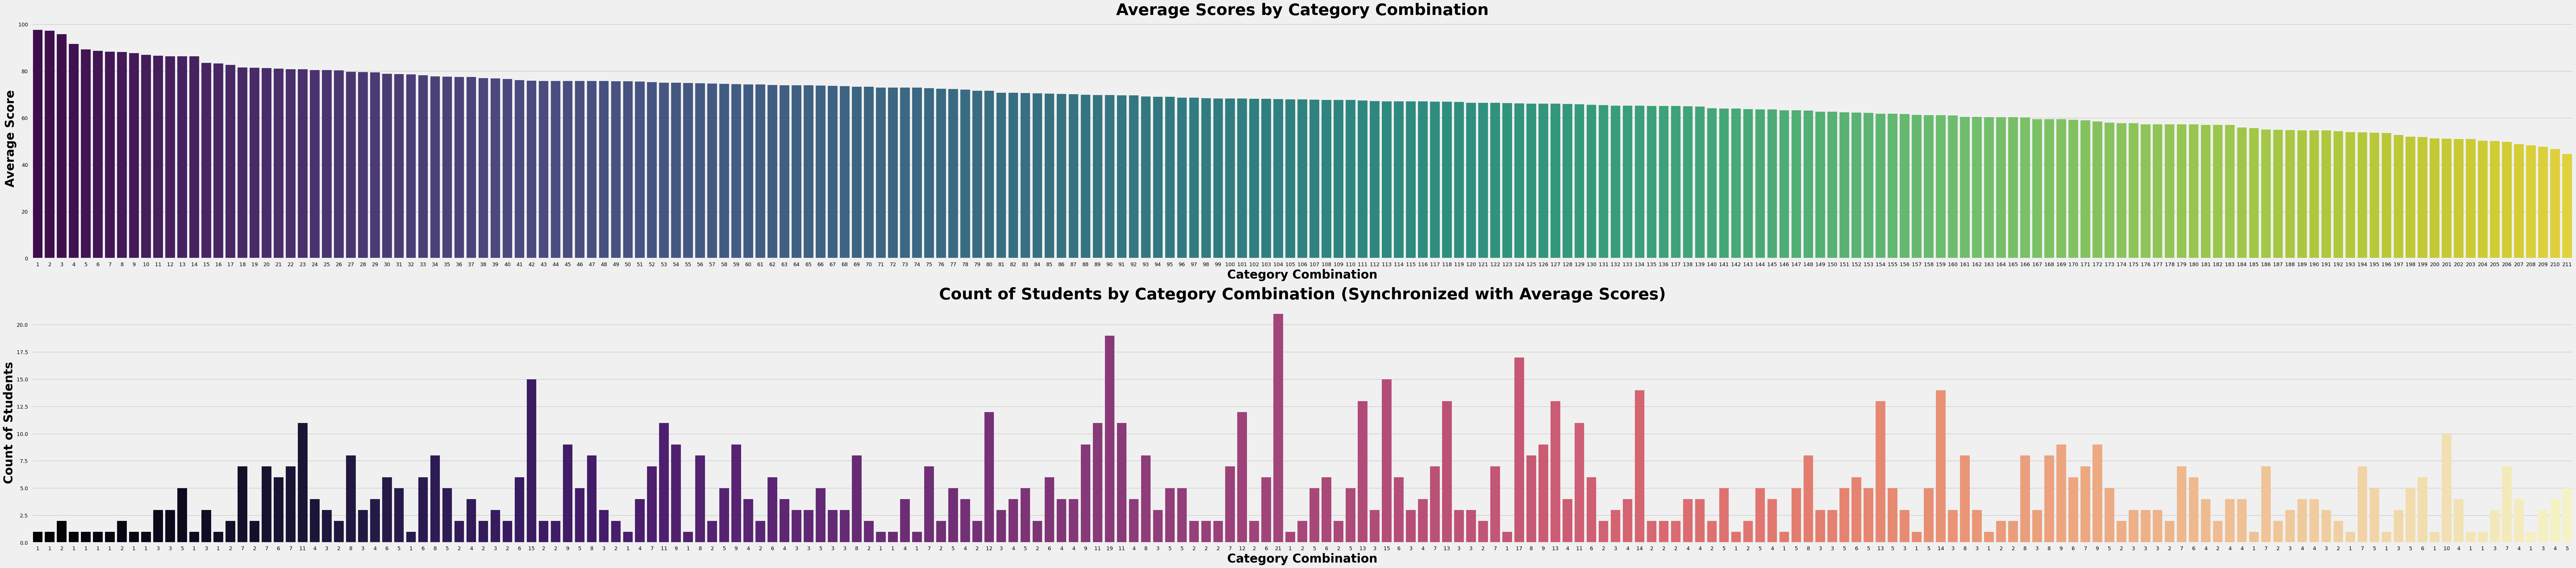

In [329]:
p = df.groupby(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])['average'].mean().reset_index()
p = p.sort_values(by='average', ascending=False).reset_index(drop=True)
p_count = df.groupby(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']).size().reset_index(name='count')
p_combined = p.merge(p_count, on=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

plt.figure(figsize=(90, 20))
plt.subplot(2, 1, 1)  

ax = sns.barplot(x=p.index+1, y="average", data=p, palette="viridis")

plt.title("Average Scores by Category Combination", fontsize=40, fontweight='bold')
plt.xlabel("Category Combination", fontsize=30,fontweight='bold')
plt.ylabel("Average Score", fontsize=30,fontweight='bold')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
ax2 = sns.barplot(x=p_combined.index, y="count", data=p_combined, palette="magma")
ax2.set_xticklabels(p_combined['count'])
plt.title("Count of Students by Category Combination (Synchronized with Average Scores)", fontsize=40, fontweight='bold')
plt.xlabel("Category Combination", fontsize=30,fontweight='bold')
plt.ylabel("Count of Students", fontsize=30,fontweight='bold')
plt.tight_layout()

plt.show()

In [330]:
grouped = df.groupby(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])['average'].mean().reset_index()

grouped = grouped.sort_values(by='average', ascending=False)

p_count = df.groupby(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']).size().reset_index(name='count')

p_combined = grouped.merge(p_count, on=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])
pd.set_option('display.max_rows', 210)

for index, row in p_combined.iterrows():
    print(index+1,f"Gender: {row['gender']}, Race: {row['race_ethnicity']}, Parental Education: {row['parental_level_of_education']}, "
          f"Lunch: {row['lunch']}, Test Prep: {row['test_preparation_course']} -> Average Score: {round(row['average'], 2)}, "
          f"Number of Students: {row['count']}")
p_combined['index'] = range(1, len(p_combined) + 1)
p_combined = p_combined[['index', 'gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'average', 'count']]
p_combined.to_csv('all_possibilities.csv', index=False)


1 Gender: female, Race: group D, Parental Education: bachelor's degree, Lunch: free/reduced, Test Prep: completed -> Average Score: 97.67, Number of Students: 1
2 Gender: female, Race: group E, Parental Education: bachelor's degree, Lunch: free/reduced, Test Prep: completed -> Average Score: 97.33, Number of Students: 1
3 Gender: female, Race: group E, Parental Education: master's degree, Lunch: standard, Test Prep: completed -> Average Score: 95.83, Number of Students: 2
4 Gender: male, Race: group A, Parental Education: associate's degree, Lunch: standard, Test Prep: completed -> Average Score: 91.67, Number of Students: 1
5 Gender: female, Race: group A, Parental Education: associate's degree, Lunch: standard, Test Prep: none -> Average Score: 89.33, Number of Students: 1
6 Gender: male, Race: group E, Parental Education: some college, Lunch: free/reduced, Test Prep: none -> Average Score: 88.67, Number of Students: 1
7 Gender: male, Race: group B, Parental Education: bachelor's deg

Now lets display the group from the top

In [331]:
p= df.sort_values(by='average', ascending=False).reset_index(drop=True)

plt.figure(figsize=(500, 100))
ax = sns.barplot(x=p.index, y=p['average'])
print(p.index)



RangeIndex(start=0, stop=1000, step=1)


In [332]:
df.sort_values(by='average', ascending=False).reset_index(drop=True)

gender race_ethnicity parental_level_of_education         lunch  \
0      male        group E           bachelor's degree      standard   
1    female        group E           bachelor's degree      standard   
2    female        group E          associate's degree      standard   
3    female        group E           bachelor's degree      standard   
4    female        group D            some high school      standard   
..      ...            ...                         ...           ...   
995    male        group E            some high school      standard   
996    male        group A                some college  free/reduced   
997    male        group B                 high school  free/reduced   
998  female        group B                 high school  free/reduced   
999  female        group C            some high school  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                 completed         100            100            100   
1                      none         100            100            100   
2                      none         100            100            100   
3                 completed          99            100            100   
4                 completed          97            100            100   
..                      ...         ...            ...            ...   
995                    none          30             26             22   
996                    none          28             23             19   
997                    none          30             24             15   
998                    none           8             24             23   
999                    none           0             17             10   

     total score     average  average_range  
0            300  100.000000  (54.5, 100.0]  
1            300  100.000000  (54.5, 100.0]  
2            300  100.000000  (54.5, 100.0]  
3            299   99.666667  (54.5, 100.0]  
4            297   99.000000  (54.5, 100.0]  
..           ...         ...            ...  
995           78   26.000000  (8.909, 54.5]  
996           70   23.333333  (8.909, 54.5]  
997           69   23.000000  (8.909, 54.5]  
998           55   18.333333  (8.909, 54.5]  
999           27    9.000000  (8.909, 54.5]  

[1000 rows x 11 columns]